# Introduction to Data Science

## Predictive Analysis - numerical and categorical data

### The sinking of Titanic  
Based on [this](https://www.kaggle.com/c/titanic-gettingStarted) Kaggle Competition.

## The Mighty Titanic !

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

# 1 - (Installing and) Loading Basic Packages

In [1]:
#!pip install -U -q  scikit-learn 
#!pip install -U -q  imbalanced-learn 
#!pip install -U -q  xgboost 
#!pip install -U -q  lightgbm 
#!pip install -U -q  rgf_python 
#!pip install -U -q  forestci
#!pip install -U -q  tpot 
# pip install -U -q pycaret
#!pip install -U -q  tensorflow tensorboard 
#!pip install -U -q  torch torchvision 
#!pip install -U -q  delayed
#!pip install -U -q  joblib 

In [2]:
import os
import sys
import time
import pickle
import itertools
import warnings
import string
import re

import numpy as np
import pylab
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1.1 - Testing if GPU is present

In [3]:
## Optional -- testing GPU support to tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2022-10-03 23:23:31.242216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 23:23:31.372381: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-03 23:23:31.839953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-03 23:23:31.840026: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

2.10.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 986693239787305951
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11911561216
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12254798560372570076
physical_device_desc: "device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


2022-10-03 23:23:32.321261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 23:23:32.394152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 23:23:32.426060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 23:23:32.426301: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

# 2 - Load Dataset and Distinguishing Attributes

In [4]:
datapath = "./data/Titanic"

In [5]:
df_train = pd.read_csv(os.path.join(datapath,'kaggle_titanic_train.csv'))
# df_test = pd.read_csv(os.path.join(datapath,'kaggle_titanic_test.csv')) No labels

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#print(df_train.columns)
print(df_train.select_dtypes(include='number').columns)
print(df_train.select_dtypes(include='object').columns)
print(df_train.select_dtypes(include='category').columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Index([], dtype='object')


In [9]:
print(df_train.dtypes)
#print(df_train.dtypes[df_train.dtypes.map(lambda x: x =='int64')])
#print(df_train.dtypes[df_train.dtypes.map(lambda x: x =='float64')])
#print(df_train.dtypes[df_train.dtypes.map(lambda x: x =='object')])

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [10]:
for cat in df_train.columns:
    print(f"Number of levels in category '{cat}': \b {df_train[cat].unique().size:2.2f} ")

Number of levels in category 'PassengerId': 891.00 
Number of levels in category 'Survived': 2.00 
Number of levels in category 'Pclass': 3.00 
Number of levels in category 'Name': 891.00 
Number of levels in category 'Sex': 2.00 
Number of levels in category 'Age': 89.00 
Number of levels in category 'SibSp': 7.00 
Number of levels in category 'Parch': 7.00 
Number of levels in category 'Ticket': 681.00 
Number of levels in category 'Fare': 248.00 
Number of levels in category 'Cabin': 148.00 
Number of levels in category 'Embarked': 4.00 


## 2.1 - Examining the numeric values

In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2.2 - Examining the categorical values (first 20)

In [12]:
# There are many values for name and ticket

for cat in df_train.select_dtypes(include='object').columns:
    print(f"Unique values for category '{cat}': \b {df_train[cat].unique()[0:20]}\n")

Unique values for category 'Name': ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima']

Unique values for category 'Sex': ['male' 'female']

Unique values for category 'Ticket': ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '24

## 2.3 - Checking for missing values  
This part demands a closer look to check if there are missing values not immediately identifiable

In [13]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


<AxesSubplot:>

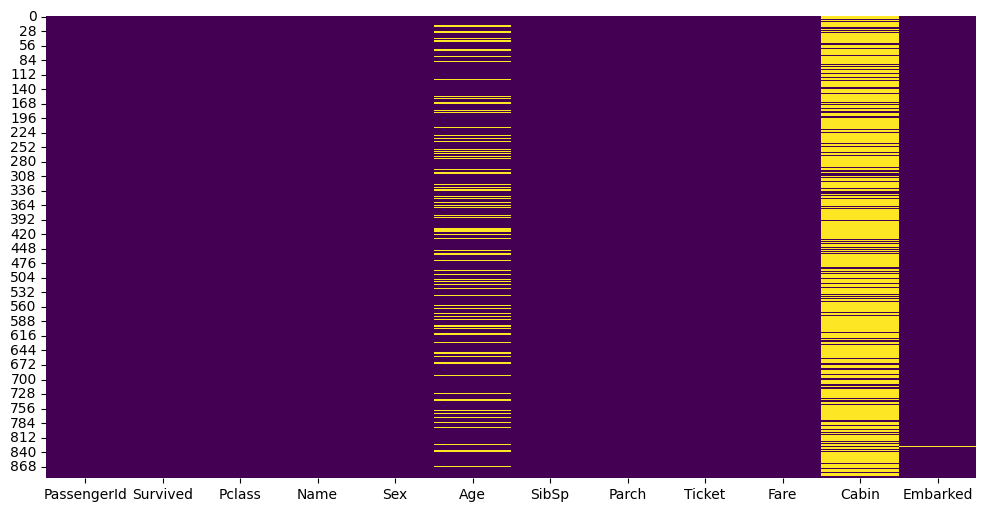

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.isnull(),cbar=False,cmap='viridis')

In [16]:
#!pip install missingno
import missingno as msno

<AxesSubplot:>

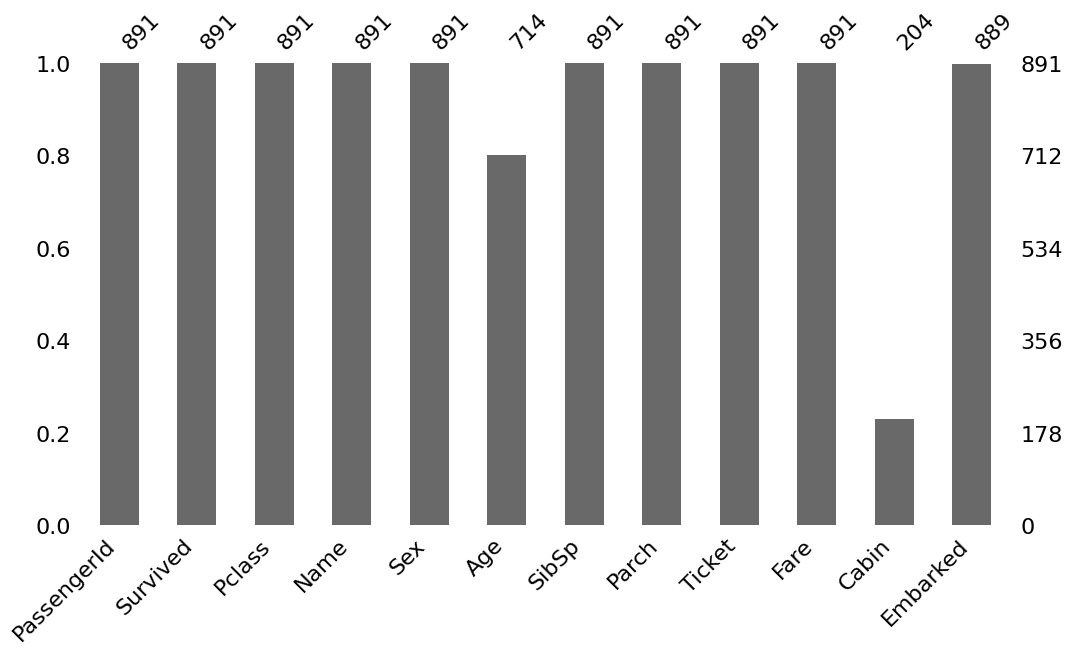

In [17]:
msno.bar(df_train, figsize=(12,6))

<AxesSubplot:>

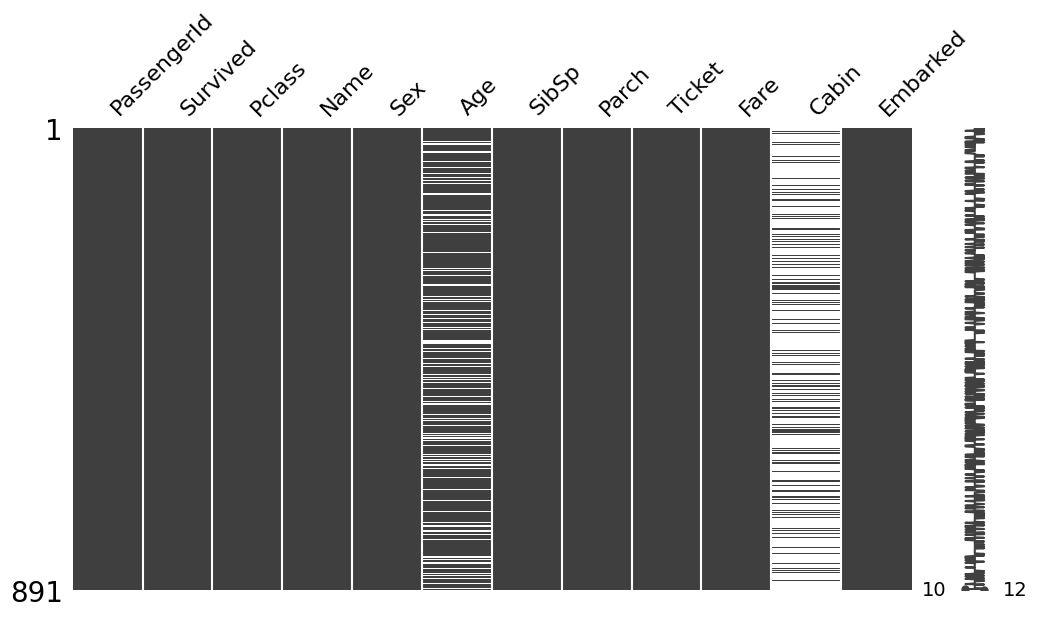

In [18]:
msno.matrix(df_train, figsize=(12,6))

<AxesSubplot:>

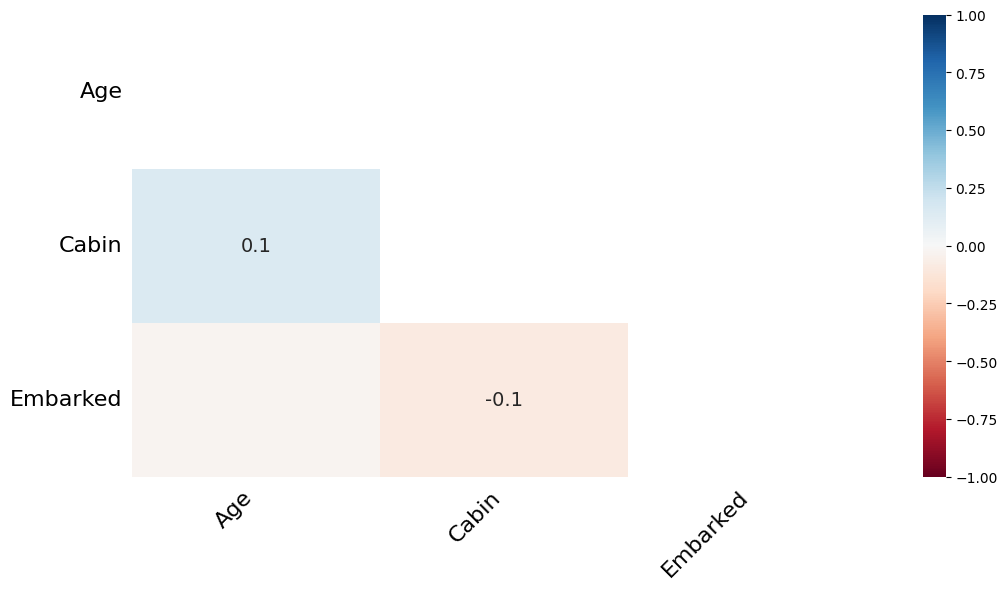

In [19]:
msno.heatmap(df_train, figsize=(12,6))

<AxesSubplot:>

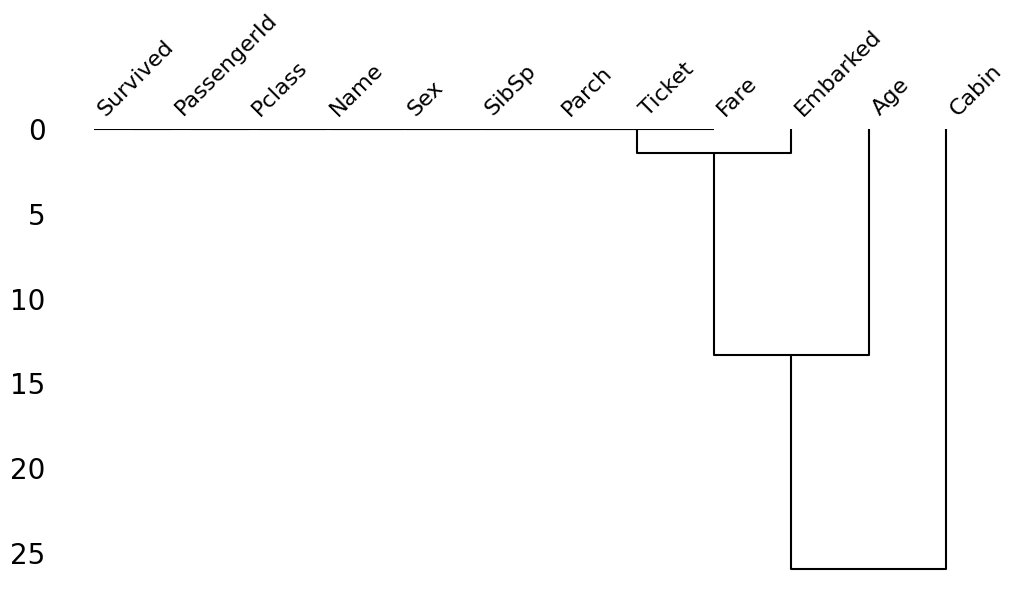

In [20]:
msno.dendrogram(df_train, figsize=(12,6))

# 3 - Data Transformations
 + Creating Train and Validation sets
 + Encoding Categorical Fields (Sex, Embarked, Name, Ticket, Cabin) 
 + Decide how to fill the Missing Values (Embarked, Cabin, Age)  
 + Standardizing Numerical Fields (Age, Pclass, SibSp, Parch, Fare) + Encoded Categorical Fields
 + Encoding Target variable (Survived))¶

In [21]:
# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn import model_selection

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder

# https://scikit-learn.org/stable/modules/impute.html
from sklearn.impute import SimpleImputer

# https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
from sklearn.preprocessing import LabelBinarizer

## 3.1 - Creating cross-validation subsets:

In [22]:
df_train.drop(["PassengerId"], axis=1, inplace=True)
y = df_train.pop("Survived")
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_train, y, test_size=0.2, random_state=0)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 10)
(179, 10)
(712,)
(179,)


In [24]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
1,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
2,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
3,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
4,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S


## 3.2 - Transforming Sex/Gender (stateful/binary)

In [25]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train['Sex'].values.reshape(-1, 1))

OneHotEncoder(handle_unknown='ignore')

In [26]:
enc.categories_[0]

array(['female', 'male'], dtype=object)

In [27]:
gender_train = pd.DataFrame(enc.transform(X_train['Sex'].values.reshape(-1, 1)).toarray(), columns=enc.categories_[0], dtype=np.int8)
gender_test = pd.DataFrame(enc.transform(X_test['Sex'].values.reshape(-1, 1)).toarray(), columns=enc.categories_[0], dtype=np.int8)

In [28]:
gender_train[0:2]

,female,male
0,1,0
1,0,1


In [29]:
X_train.drop(['Sex'], axis=1, inplace=True)
X_train = pd.concat([X_train, gender_train], axis=1)
X_test.drop(['Sex'], axis=1, inplace=True)
X_test = pd.concat([X_test, gender_test], axis=1)
X_train.head(5)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,3,"Boulos, Mrs. Joseph (Sultana)",NaN,0,2,2678,15.2458,NaN,C,1,0
1,2,"Kvillner, Mr. Johan Henrik Johannesson",31.0,0,0,C.A. 18723,10.5000,NaN,S,0,1
2,2,"Mallet, Mr. Albert",31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,0,1
3,3,"Betros, Mr. Tannous",20.0,0,0,2648,4.0125,NaN,C,0,1
4,3,"Windelov, Mr. Einar",21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S,0,1


## 3.3 - Transforming Embarked (stateful)  
 We can decide to substitute the missing values using a missing value imputation technique, or simply encoding the missing values as an additional category using OHE

In [30]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train['Embarked'].values.reshape(-1, 1))

OneHotEncoder(handle_unknown='ignore')

In [31]:
embarked_train = pd.DataFrame(enc.transform(X_train['Embarked'].values.reshape(-1, 1)).toarray(), columns=enc.categories_[0],dtype=np.int8)
embarked_train.rename({np.nan: "U"}, axis='columns', inplace=True)
embarked_test = pd.DataFrame(enc.transform(X_test['Embarked'].values.reshape(-1, 1)).toarray(), columns=enc.categories_[0],dtype=np.int8)
embarked_test.rename({np.nan: "U"}, axis='columns', inplace=True)

In [32]:
embarked_train.columns

Index(['C', 'Q', 'S', 'U'], dtype='object')

In [33]:
embarked_train.rename({np.nan: "U"}, axis='columns', inplace=True)

In [34]:
embarked_train[0:2]

,C,Q,S,U
0,1,0,0,0
1,0,0,1,0


In [35]:
X_train.drop(['Embarked'], axis=1, inplace=True)
X_train = pd.concat([X_train, embarked_train], axis=1)
X_test.drop(['Embarked'], axis=1, inplace=True)
X_test = pd.concat([X_test, embarked_test], axis=1)
X_train.head(5)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,U
0,3,"Boulos, Mrs. Joseph (Sultana)",NaN,0,2,2678,15.2458,NaN,1,0,1,0,0,0
1,2,"Kvillner, Mr. Johan Henrik Johannesson",31.0,0,0,C.A. 18723,10.5000,NaN,0,1,0,0,1,0
2,2,"Mallet, Mr. Albert",31.0,1,1,S.C./PARIS 2079,37.0042,NaN,0,1,1,0,0,0
3,3,"Betros, Mr. Tannous",20.0,0,0,2648,4.0125,NaN,0,1,1,0,0,0
4,3,"Windelov, Mr. Einar",21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,0,1,0,0,1,0


## 3.4 - Transforming Name (stateful)  
Name is a textual field. We can be very creative when deciding to create features, vectorizing every word, etc.  
In this notebook, we will just extract the titles and surnames and create features out of it.

In [36]:
# Create function that take name and separates it into title, family name and deletes all puntuation from name column:
def name_sep(data):
    families=[]
    titles = []
    new_name = []
    #for each row in dataset:
    for i in range(len(data)):
        name = data.iloc[i]
        # extract name inside brackets into name_bracket:
        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(",")[0]
        title = name_no_bracket.split(",")[1].strip().split(" ")[0]
        
        #remove punctuations accept brackets:
        for c in string.punctuation:
            name = name.replace(c,"").strip()
            family = family.replace(c,"").strip()
            title = title.replace(c,"").strip()
            
        families.append(family)
        titles.append(title)
        new_name.append(name)
            
    return families, titles, new_name 

In [37]:
dict_train_name = dict(zip(['surname', 'title', 'newname'], name_sep(X_train["Name"])))
X_train_name = pd.DataFrame(dict_train_name)
dict_test_name = dict(zip(['surname', 'title', 'newname'], name_sep(X_test["Name"])))
X_test_name = pd.DataFrame(dict_test_name)

X_train_name.head()

,surname,title,newname
0,Boulos,Mrs,Boulos Mrs Joseph Sultana
1,Kvillner,Mr,Kvillner Mr Johan Henrik Johannesson
2,Mallet,Mr,Mallet Mr Albert
3,Betros,Mr,Betros Mr Tannous
4,Windelov,Mr,Windelov Mr Einar


In [38]:
X_train_name.title.value_counts()

Mr        419
Miss      145
Mrs        96
Master     35
Rev         3
Dr          3
Mlle        2
Major       2
Col         1
Ms          1
Mme         1
the         1
Lady        1
Capt        1
Sir         1
Name: title, dtype: int64

Let's reduce the feature space converting some equivalent titles:

In [39]:
X_train_name['title'] = X_train_name['title'].replace(['Ms', 'Mlle'],'Miss')
X_train_name['title'] = X_train_name['title'].replace(['Mme'],'Mrs')
X_train_name['title'] = X_train_name['title'].replace(['Dr','Rev','the','Jonkheer','Lady','Sir', 'Don'],'Nobles')
X_train_name['title'] = X_train_name['title'].replace(['Major','Col', 'Capt'],'Navy')

X_test_name['title'] = X_test_name['title'].replace(['Ms', 'Mlle'],'Miss')
X_test_name['title'] = X_test_name['title'].replace(['Mme'],'Mrs')
X_test_name['title'] = X_test_name['title'].replace(['Dr','Rev','the','Jonkheer','Lady','Sir', 'Don'],'Nobles')
X_test_name['title'] = X_test_name['title'].replace(['Major','Col', 'Capt'],'Navy')

In [40]:
X_train_name.title.value_counts()

Mr        419
Miss      148
Mrs        97
Master     35
Nobles      9
Navy        4
Name: title, dtype: int64

### 3.4.1 - Encoding Title

In [41]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train_name['title'].values.reshape(-1, 1))

OneHotEncoder(handle_unknown='ignore')

In [42]:
title_train = pd.DataFrame(enc.transform(X_train_name['title'].values.reshape(-1, 1)).toarray(), columns=enc.categories_[0],dtype=np.int8)
title_test = pd.DataFrame(enc.transform(X_test_name['title'].values.reshape(-1, 1)).toarray(), columns=enc.categories_[0],dtype=np.int8)

In [43]:
title_train.head(5)

,Master,Miss,Mr,Mrs,Navy,Nobles
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [44]:
X_train.drop(['Name'], axis=1, inplace=True)
X_train = pd.concat([X_train, title_train], axis=1)
X_test.drop(['Name'], axis=1, inplace=True)
X_test = pd.concat([X_test, title_test], axis=1)
X_train.head(5)

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,U,Master,Miss,Mr,Mrs,Navy,Nobles
0,3,NaN,0,2,2678,15.2458,NaN,1,0,1,0,0,0,0,0,0,1,0,0
1,2,31.0,0,0,C.A. 18723,10.5000,NaN,0,1,0,0,1,0,0,0,1,0,0,0
2,2,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,0,1,1,0,0,0,0,0,1,0,0,0
3,3,20.0,0,0,2648,4.0125,NaN,0,1,1,0,0,0,0,0,1,0,0,0
4,3,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,0,1,0,0,1,0,0,0,1,0,0,0


### 3.4.2 - Encoding Surname
First let's examine the frequency of surnames:

<AxesSubplot:ylabel='Frequency'>

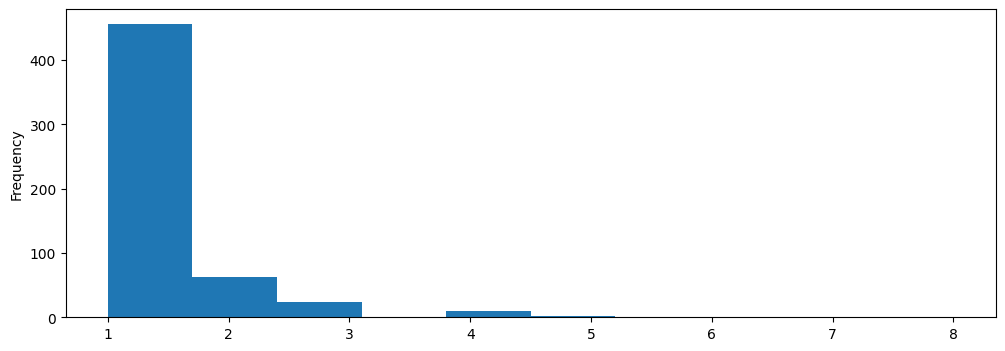

In [45]:
X_train_name.surname.value_counts().plot(kind="hist", figsize=(12,4))

Given that most of the surnames are unique, let's just use a frequency encoder

In [46]:
surnames_train = pd.Series(X_train_name.surname.value_counts().values, name="Surname")
X_train = pd.concat([X_train, surnames_train], axis=1)

surnames_test = pd.Series(X_test_name.surname.value_counts().values, name="Surname")
X_test = pd.concat([X_test, surnames_test], axis=1)

X_train.head(5)

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,U,Master,Miss,Mr,Mrs,Navy,Nobles,Surname
0,3,NaN,0,2,2678,15.2458,NaN,1,0,1,0,0,0,0,0,0,1,0,0,8.0
1,2,31.0,0,0,C.A. 18723,10.5000,NaN,0,1,0,0,1,0,0,0,1,0,0,0,7.0
2,2,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,0,1,1,0,0,0,0,0,1,0,0,0,5.0
3,3,20.0,0,0,2648,4.0125,NaN,0,1,1,0,0,0,0,0,1,0,0,0,5.0
4,3,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,0,1,0,0,1,0,0,0,1,0,0,0,4.0


## 3.5 - Transforming Ticket (stateless)

We can indeed data mine out some interesting relationship from Ticket number. But I think it is best to drop it.  
We could find some relationship between Pclass and Ticket number, and although one could see that there might be some relationship between them, it is not very strong  
We decided to drop this variable as well.

In [47]:
X_train.drop(['Ticket'], axis=1, inplace=True)
X_test.drop(['Ticket'], axis=1, inplace=True)
X_train.head(5)

,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S,U,Master,Miss,Mr,Mrs,Navy,Nobles,Surname
0,3,NaN,0,2,15.2458,NaN,1,0,1,0,0,0,0,0,0,1,0,0,8.0
1,2,31.0,0,0,10.5000,NaN,0,1,0,0,1,0,0,0,1,0,0,0,7.0
2,2,31.0,1,1,37.0042,NaN,0,1,1,0,0,0,0,0,1,0,0,0,5.0
3,3,20.0,0,0,4.0125,NaN,0,1,1,0,0,0,0,0,1,0,0,0,5.0
4,3,21.0,0,0,7.2500,NaN,0,1,0,0,1,0,0,0,1,0,0,0,4.0


## 3.6 - Transforming Cabin (stateful)

Instead of using the Cabin feature as it is - using traditional hot-encoding, we can try using only the letters.  
After doing some research, we could know that a cabin number looks like ‘C123’ and the letter refers to the deck.  
+ We’re going to extract these and create a new feature, that contains a persons deck.  
+ And then we will convert the feature into a numeric variable.

In [48]:
X_train['Cabin'].value_counts()

C23 C25 C27    3
G6             3
C22 C26        3
E101           3
D              3
              ..
D17            1
D50            1
A14            1
A36            1
E49            1
Name: Cabin, Length: 127, dtype: int64

In [49]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [X_train, X_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [50]:
X_train.drop(['Cabin'], axis=1, inplace=True)
X_test.drop(['Cabin'], axis=1, inplace=True)

X_train.head(5)

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,U,Master,Miss,Mr,Mrs,Navy,Nobles,Surname,Deck
0,3,NaN,0,2,15.2458,1,0,1,0,0,0,0,0,0,1,0,0,8.0,8
1,2,31.0,0,0,10.5000,0,1,0,0,1,0,0,0,1,0,0,0,7.0,8
2,2,31.0,1,1,37.0042,0,1,1,0,0,0,0,0,1,0,0,0,5.0,8
3,3,20.0,0,0,4.0125,0,1,1,0,0,0,0,0,1,0,0,0,5.0,8
4,3,21.0,0,0,7.2500,0,1,0,0,1,0,0,0,1,0,0,0,4.0,8


## 3.7 - Transforming Age (stateful)  
We will use the iterative inputer that chooses to fill the missing values using a model with the other features

In [51]:
imp_mean = IterativeImputer(random_state=0)

In [52]:
imp_mean.fit(X_train)

IterativeImputer(random_state=0)

In [53]:
X_train = pd.DataFrame(imp_mean.transform(X_train.values), columns=X_train.columns)
X_test = pd.DataFrame(imp_mean.transform(X_test.values), columns=X_test.columns)

## 3.8 - Standardizing values
+ Check there are no more missing values   
+ Check all features are numeric

In [54]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


In [55]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,U,Master,Miss,Mr,Mrs,Navy,Nobles,Surname,Deck
0,3.0,28.792526,0.0,2.0,15.2458,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,8.0
1,2.0,31.000000,0.0,0.0,10.5000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,8.0
2,2.0,31.000000,1.0,1.0,37.0042,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,8.0
3,3.0,20.000000,0.0,0.0,4.0125,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,8.0
4,3.0,21.000000,0.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,8.0


In [56]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,U,Master,Miss,Mr,Mrs,Navy,Nobles,Surname,Deck
0,3.0,27.771277,0.0,0.0,14.4583,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,8.0
1,3.0,29.328240,0.0,0.0,7.5500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,8.0
2,3.0,7.000000,4.0,1.0,29.1250,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0
3,1.0,39.715831,1.0,0.0,146.5208,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
4,3.0,29.000000,0.0,2.0,15.2458,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,8.0


In [57]:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

for column in X_train.columns:
    scaler.fit(X_train[column].values.reshape(-1, 1))
    X_train[column] = scaler.transform(X_train[column].values.reshape(-1, 1))
    X_test[column] = scaler.transform(X_test[column].values.reshape(-1, 1))

X_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,U,Master,Miss,Mr,Mrs,Navy,Nobles,Surname,Deck
0,0.819251,-0.054506,-0.464452,1.959264,-0.331679,1.372075,-1.372075,2.125883,-0.31427,-1.628276,-0.053074,-0.227373,-0.512261,-1.195840,2.517977,-0.075165,-0.113147,10.202064,0.512425
1,-0.380968,0.106433,-0.464452,-0.477410,-0.426405,-0.728823,0.728823,-0.470393,-0.31427,0.614147,-0.053074,-0.227373,-0.512261,0.836232,-0.397144,-0.075165,-0.113147,8.683281,0.512425
2,-0.380968,0.106433,0.412710,0.740927,0.102620,-0.728823,0.728823,2.125883,-0.31427,-1.628276,-0.053074,-0.227373,-0.512261,0.836232,-0.397144,-0.075165,-0.113147,5.645715,0.512425
3,0.819251,-0.695536,-0.464452,-0.477410,-0.555896,-0.728823,0.728823,2.125883,-0.31427,-1.628276,-0.053074,-0.227373,-0.512261,0.836232,-0.397144,-0.075165,-0.113147,5.645715,0.512425
4,0.819251,-0.622630,-0.464452,-0.477410,-0.491276,-0.728823,0.728823,-0.470393,-0.31427,0.614147,-0.053074,-0.227373,-0.512261,0.836232,-0.397144,-0.075165,-0.113147,4.126932,0.512425


## 3.9 - Balancing the classes

In [59]:
print(len(y_train[y_train == 0]))
print(len(y_train[y_train == 1]))

439
273


### 3.9.1 - Oversampling the minority class

In [60]:
# http://contrib.scikit-learn.org/imbalanced-learn/  
from imblearn.over_sampling import SMOTE

In [61]:
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [62]:
print(X_train.shape)
print(y_train.shape)
print(len(y_train[y_train == 0]))
print(len(y_train[y_train == 1]))

(878, 19)
(878,)
439
439


# 4 - Preparing Metrics and Evaluation Functions

## 4.1 - Importing Metrics 

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## 4.2 - Creating Cross validation folds

In [64]:
cv = model_selection.StratifiedKFold(n_splits=5)

## 4.3 - Creating functions to evaluate the models

In [65]:
def mean_scores_cv(clf, cv, X, y):
    scores = model_selection.cross_val_score(clf, X, y, 
                                             scoring=None, 
                                             cv=cv, 
                                             n_jobs=1,
                                             verbose=0,
                                             fit_params=None,
                                             pre_dispatch='2*n_jobs')
    return scores.mean()


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def clf_eval(clf, X, y_true, classes=['Perished', 'Survived']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

# 5 - Running Models

## 5.1 - Linear Classifiers

A linear classifier achieves this by making a classification decision based on the value of a linear combination of the characteristics. An object's characteristics are also known as feature values and are typically presented to the machine in a vector called a feature vector. Such classifiers work well for practical problems such as document classification, and more generally for problems with many variables (features), reaching accuracy levels comparable to non-linear classifiers while taking less time to train and use.

### 5.1.1 - [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  

Logistic regression is a classification algorithm based on the function which is used at the core of the method, logistic function or sigmoid function. It’s an S-shaped curve that is used to predict a binary outcome (1/0, Yes/No, True/False) given a set of independent variables.

+ It can also be thought of as a special case of linear regression when the outcome variable is categorical, where we are using the log of odds as a dependent variable.
+ It predicts the probability of occurrence of an event by fitting data to a logit function.

$f(x) = \frac{L}{1 + e^{-k(x-x_0)}} $  

Logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. In the binary case, a dependent variable (the output) can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.


![Logistic](https://www.saedsayad.com/images/LogReg_1.png)

Classification Report
              precision    recall  f1-score   support

    Perished       0.88      0.84      0.86       110
    Survived       0.76      0.81      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC Score: 0.8239789196310936
Accuracy Score: 0.8268156424581006
Average Precision Score: 0.6868050951121148
f1 Score: 0.7832167832167832
Confusion matrix, without normalization
[[92 18]
 [13 56]]
CPU times: user 70.7 ms, sys: 21 ms, total: 91.6 ms
Wall time: 65.4 ms


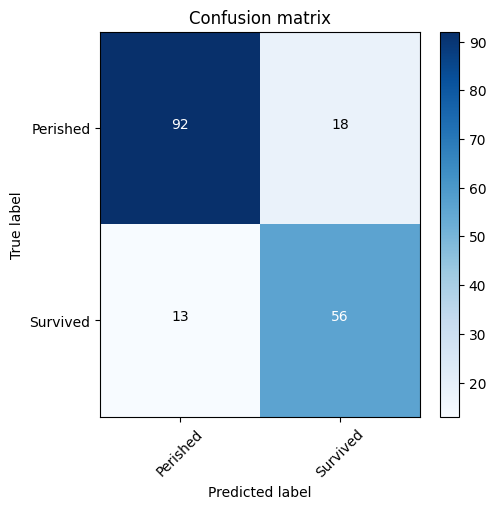

In [66]:
%%time
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(penalty='l2',
                            dual=False, 
                            tol=0.001, 
                            C=0.10, 
                            fit_intercept=True, 
                            intercept_scaling=1, 
                            class_weight=None, 
                            random_state=0, 
                            solver='saga', 
                            max_iter=100, 
                            multi_class='ovr', 
                            verbose=0, 
                            warm_start=False, 
                            n_jobs=-1).fit(X_train, y_train)

roc_lr = clf_eval(clf_lr, X_test, y_test)

### 5.1.1.2 - Logistic Regression with Grid Search

For each model, we will also run with hyperparameter search for the best parameters

In [67]:
%%time

estimator = LogisticRegression(dual=False, 
                               penalty='l2',
                               fit_intercept=True, 
                               intercept_scaling=1, 
                               class_weight=None, 
                               random_state=0, 
                               solver='saga', 
                               multi_class='ovr', 
                               verbose=0, 
                               warm_start=False, 
                               n_jobs=1)

Cs = np.linspace(0,1,10)
max_iter = [10, 50, 100, 200]
tol = [1e-5, 1e-4, 1e-3]
param_grid=dict(C=Cs, max_iter=max_iter)


clf_lr2 = model_selection.GridSearchCV(param_grid=param_grid,                       ## Grid Search (more exhaustive)
#clf_lr2 = model_selection.RandomizedSearchCV(param_distributions=param_grid,       ## Randomized (faster)
                                       estimator=estimator,
                                       cv=cv,                                       ## using cross validation
                                       n_jobs=1)
clf_lr2.fit(X_train, y_train)

print(clf_lr2.best_score_)
print(clf_lr2.best_estimator_.C)
print(clf_lr2.best_estimator_.max_iter)
print(clf_lr2.best_estimator_.tol)

0.790525974025974
0.5555555555555556
10
0.0001
CPU times: user 2.76 s, sys: 0 ns, total: 2.76 s
Wall time: 2.75 s


Classification Report
              precision    recall  f1-score   support

    Perished       0.88      0.84      0.86       110
    Survived       0.76      0.81      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC Score: 0.8239789196310936
Accuracy Score: 0.8268156424581006
Average Precision Score: 0.6868050951121148
f1 Score: 0.7832167832167832
Confusion matrix, without normalization
[[92 18]
 [13 56]]


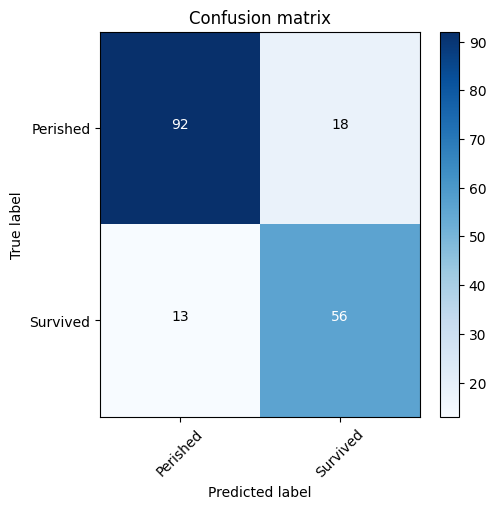

In [68]:
roc_lr = clf_eval(clf_lr2, X_test, y_test)

### 5.1.1.3 - Assessing the importance of the features

SibSp     -0.708242
Pclass    -0.575632
Mr        -0.480324
Age       -0.418616
male      -0.372946
Parch     -0.275990
Deck      -0.161722
Surname   -0.149790
S         -0.094051
Nobles    -0.028483
Navy      -0.016742
Q         -0.010663
U          0.053274
Miss       0.097161
C          0.109490
Fare       0.126813
Mrs        0.300509
female     0.372946
Master     0.454646
dtype: float64


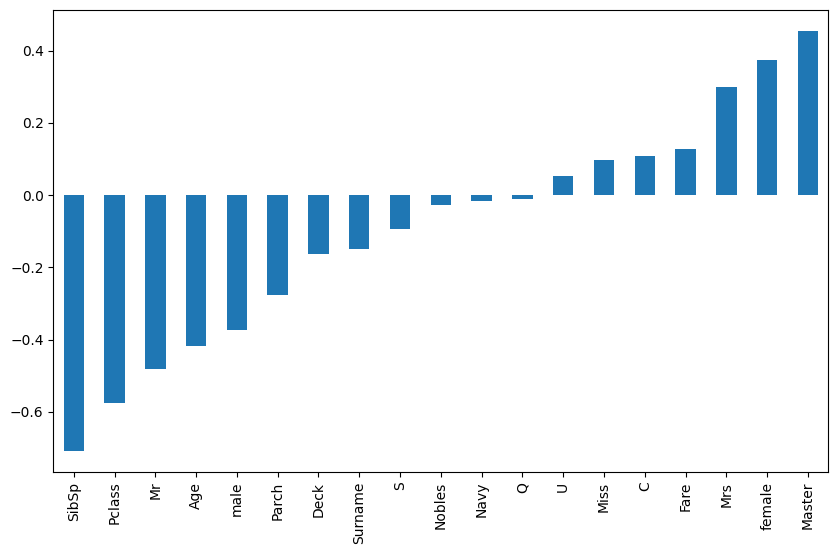

In [69]:
coefs = pd.Series(clf_lr.coef_[0], index=X_train.columns)
coefs = coefs.sort_values()
coefs.plot(kind="bar", figsize=(10,6))
print(coefs.sort_values(ascending = True))

### 5.1.1.4 -  Precision Recall Curve

For each person the classifier algorithm has to classify, it computes a probability based on a function  
It classifies the person as survived (when the score is bigger than the threshold) or as not survived (when the score is smaller than the threshold).  
That’s why the threshold plays an important part.  

We will plot the precision and recall while varying the threshold:

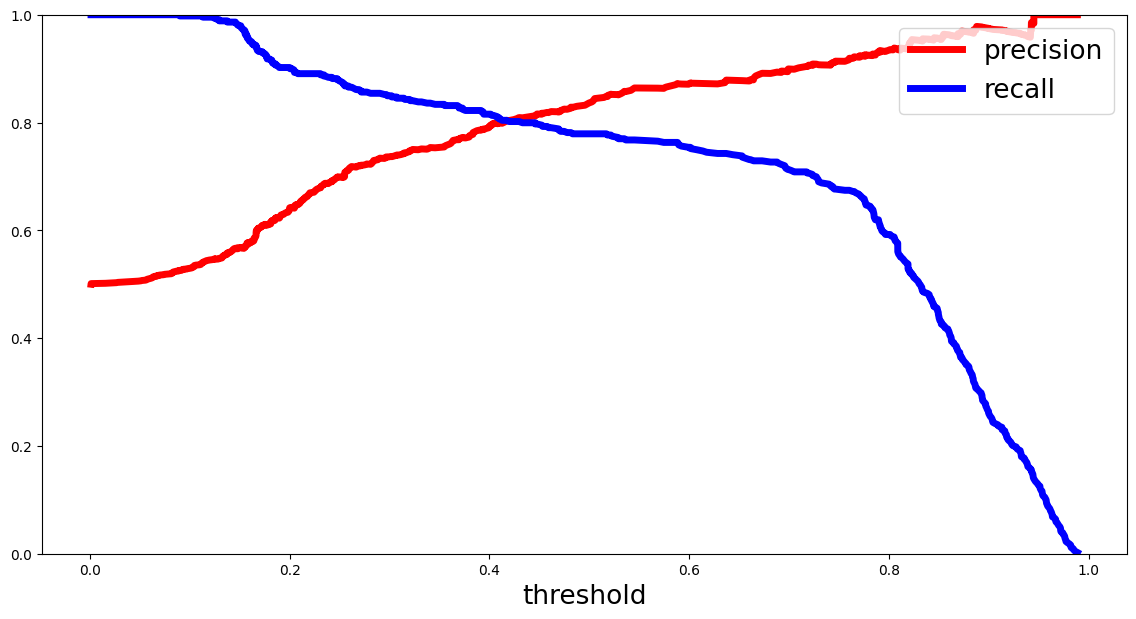

In [70]:
# getting the probabilities of our predictions
y_scores = clf_lr.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Another way is to plot the precision and recall against each other:

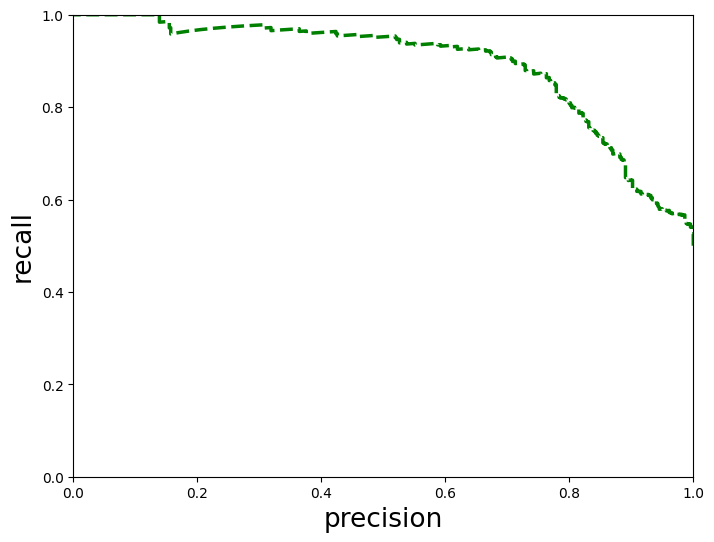

In [71]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precision, recall)
plt.show()

### 5.1.2 - [Ridge Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)  

Ridge Classifiers addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients.  
The ridge coefficients minimize a penalized residual sum of squares  
https://stats.stackexchange.com/questions/558900/why-ridgeclassifier-can-be-significantly-faster-than-logisticregression-with-a-h

Classification Report
              precision    recall  f1-score   support

    Perished       0.86      0.84      0.85       110
    Survived       0.75      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC Score: 0.8094861660079051
Accuracy Score: 0.8156424581005587
Average Precision Score: 0.6707554044206947
f1 Score: 0.7659574468085107
Confusion matrix, without normalization
[[92 18]
 [15 54]]
CPU times: user 211 ms, sys: 196 ms, total: 408 ms
Wall time: 66.1 ms


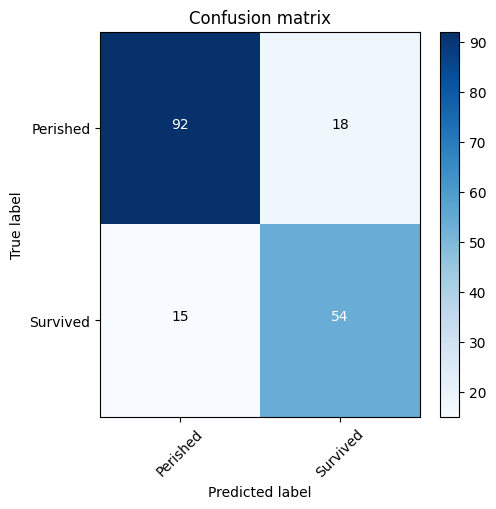

In [72]:
%%time

from sklearn.linear_model import RidgeClassifier

clf_rdg = RidgeClassifier(alpha=1.0, 
                          fit_intercept=True, 
                          normalize=False, 
                          copy_X=True, 
                          max_iter=None, 
                          tol=0.001, 
                          class_weight=None, 
                          solver='auto', 
                          random_state=0).fit(X_train, y_train)

roc_rdg = clf_eval(clf_rdg, X_test, y_test)

### 5.1.3 - [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)

Perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

Classification Report
              precision    recall  f1-score   support

    Perished       0.87      0.82      0.85       110
    Survived       0.74      0.81      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC Score: 0.8148880105401844
Accuracy Score: 0.8156424581005587
Average Precision Score: 0.6706424794071649
f1 Score: 0.7724137931034482
Confusion matrix, without normalization
[[90 20]
 [13 56]]
CPU times: user 89.7 ms, sys: 46 ms, total: 136 ms
Wall time: 74.7 ms


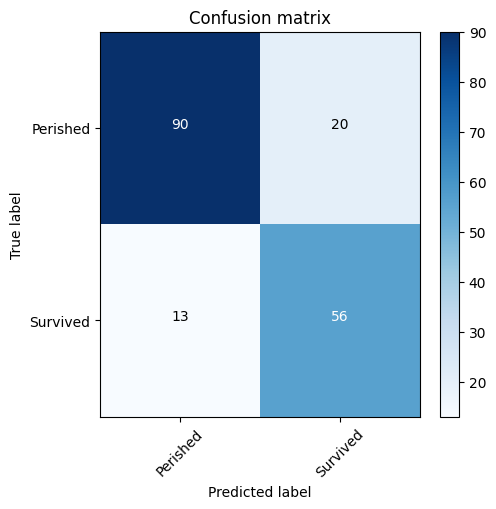

In [73]:
%%time

from sklearn.linear_model import Perceptron

clf_pcp = Perceptron(penalty=None,
                     alpha=0.001,
                     fit_intercept=True,
                     max_iter=230,
                     shuffle=True,
                     verbose=0,
                     eta0=1.0,
                     n_jobs=-1, 
                     random_state=0, 
                     class_weight=None, 
                     warm_start=False).fit(X_train, y_train)

roc_pcp = clf_eval(clf_pcp, X_test, y_test)

### 5.1.4 - [Passive Aggressive](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html)  

https://www.bonaccorso.eu/2017/10/06/ml-algorithms-addendum-passive-aggressive-algorithms/ 

Passive Aggressive Algorithms are a family of online learning algorithms (for both classification and regression) proposed by Crammer at al. The idea is very simple and their performance has been proofed to be superior to many other alternative methods like Online Perceptron and MIRA (see the original paper in the reference section). Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example. In my mind, in passive, the information hidden in the example is not enough for updating; in aggressive, the information shows that at lest this time you are wrong, a better model should modify this mistake.

Classification Report
              precision    recall  f1-score   support

    Perished       0.87      0.82      0.85       110
    Survived       0.74      0.81      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC Score: 0.8148880105401844
Accuracy Score: 0.8156424581005587
Average Precision Score: 0.6706424794071649
f1 Score: 0.7724137931034482
Confusion matrix, without normalization
[[90 20]
 [13 56]]
CPU times: user 70.8 ms, sys: 12.8 ms, total: 83.6 ms
Wall time: 56.1 ms


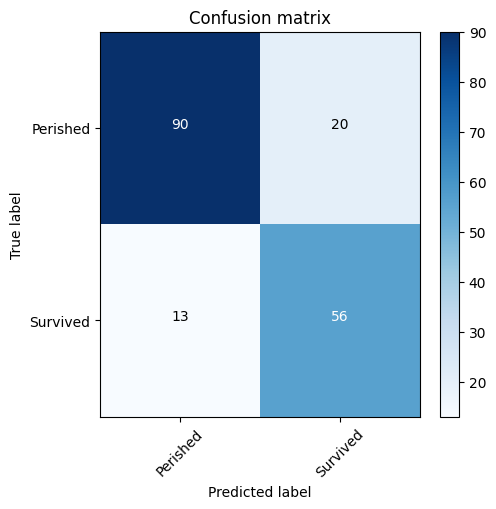

In [74]:
%%time

from sklearn.linear_model import PassiveAggressiveClassifier

clf_pac = PassiveAggressiveClassifier(C=0.1, 
                                      fit_intercept=True, 
                                      max_iter=100, 
                                      shuffle=True, 
                                      verbose=0, 
                                      loss='hinge', 
                                      n_jobs=-1, 
                                      random_state=0, 
                                      warm_start=False, 
                                      class_weight=None).fit(X_train, y_train)

roc_pac = clf_eval(clf_pac, X_test, y_test)

### 5.1.5 - [SGDC Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  

The SGDC classifier is a linear classifier (SVM, logistic regression) with SGD training. Implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.  

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

Classification Report
              precision    recall  f1-score   support

    Perished       0.86      0.80      0.83       110
    Survived       0.71      0.80      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179

ROC Score: 0.7985507246376812
Accuracy Score: 0.7988826815642458
Average Precision Score: 0.6475704685566236
f1 Score: 0.7534246575342466
Confusion matrix, without normalization
[[88 22]
 [14 55]]
CPU times: user 73.9 ms, sys: 8.53 ms, total: 82.4 ms
Wall time: 54.9 ms


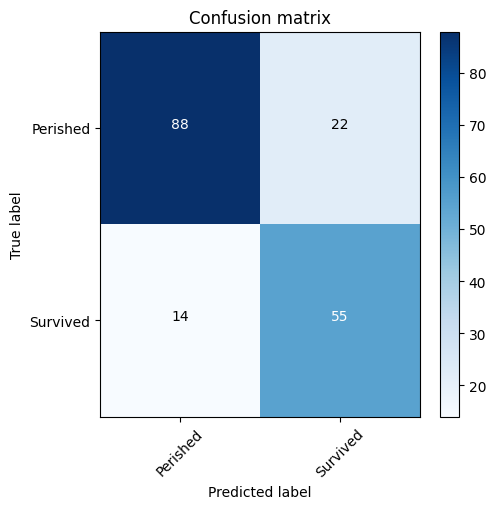

In [75]:
%%time

from sklearn.linear_model import SGDClassifier

clf_sgdc = SGDClassifier(loss='hinge',
                         penalty='l2', 
                         alpha=0.0001,
                         l1_ratio=0.15, 
                         fit_intercept=True,
                         max_iter=200, 
                         shuffle=True,
                         verbose=0,
                         epsilon=0.1,
                         n_jobs=-1,
                         random_state=0,
                         learning_rate='optimal',
                         eta0=0.0, 
                         power_t=0.5,
                         class_weight=None,
                         warm_start=False, 
                         average=False).fit(X_train, y_train)

roc_sgdc = clf_eval(clf_sgdc, X_test, y_test)

### 5.1.6 - [Support Vector Machines](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/  

Support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

An SVM will find a hyperplane or a boundary between the two classes of data that maximizes. There are other planes as well which can separate the two classes, but only the SVM hyperplane can maximize the margin between the classes.

B0 + (B1 * X1) + (B2 * X2) = 0 where, B1 and B2 determines the slope of the line and B0 (intercept) found by the learning algorithm. X1 and X2 are the two input variables.

![SVM](https://www.researchgate.net/publication/331308937/figure/fig1/AS:870140602249216@1584469094771/Illustration-of-support-vector-machine-SVM-to-generalize-the-optimal-separating.ppm)

#### Choosing the best parameters using [GridSearchCV](http://scikit-learn.org/stable/modules/grid_search.html) or [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [76]:
%%time

from sklearn import svm
estimator = svm.SVC()

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = np.linspace(0.1,3,7)
degrees = [2,3,4,5]
gammas = np.logspace(-5, 0, 7)

param_grid=dict(kernel=kernels, C=Cs, gamma=gammas, degree=degrees)


clf_svc = model_selection.GridSearchCV(param_grid=param_grid,                       ## Grid Search (more exhaustive)
#clf_svc = model_selection.RandomizedSearchCV(param_distributions=param_grid,       ## Randomized (faster)
                                       estimator=estimator,
                                       cv=cv,                                       ## using cross validation
                                       n_jobs=-1)

clf_svc.fit(X_train, y_train)

print(clf_svc.best_score_)
print(clf_svc.best_estimator_.kernel)
print(clf_svc.best_estimator_.C)
print(clf_svc.best_estimator_.degree)
print(clf_svc.best_estimator_.gamma)

0.8166558441558441
poly
2.5166666666666666
3
0.021544346900318846
CPU times: user 2.6 s, sys: 298 ms, total: 2.89 s
Wall time: 1min 17s


Classification Report
              precision    recall  f1-score   support

    Perished       0.86      0.86      0.86       110
    Survived       0.78      0.77      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC Score: 0.8158761528326746
Accuracy Score: 0.8268156424581006
Average Precision Score: 0.688064076735868
f1 Score: 0.7737226277372262
Confusion matrix, without normalization
[[95 15]
 [16 53]]


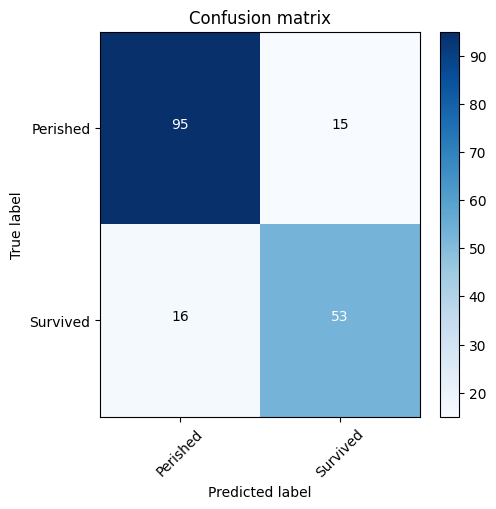

In [77]:
roc_svc = clf_eval(clf_svc, X_test, y_test)

#### 5.1.6.1 - Displaying the [learning curve](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html)

In [78]:
def plot_learning_curve(estimator, 
                        title, 
                        X, 
                        y, 
                        ylim=None, 
                        cv=None,
                        n_jobs=-1, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(16,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = model_selection.learning_curve(estimator, 
                                                            X, y, cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

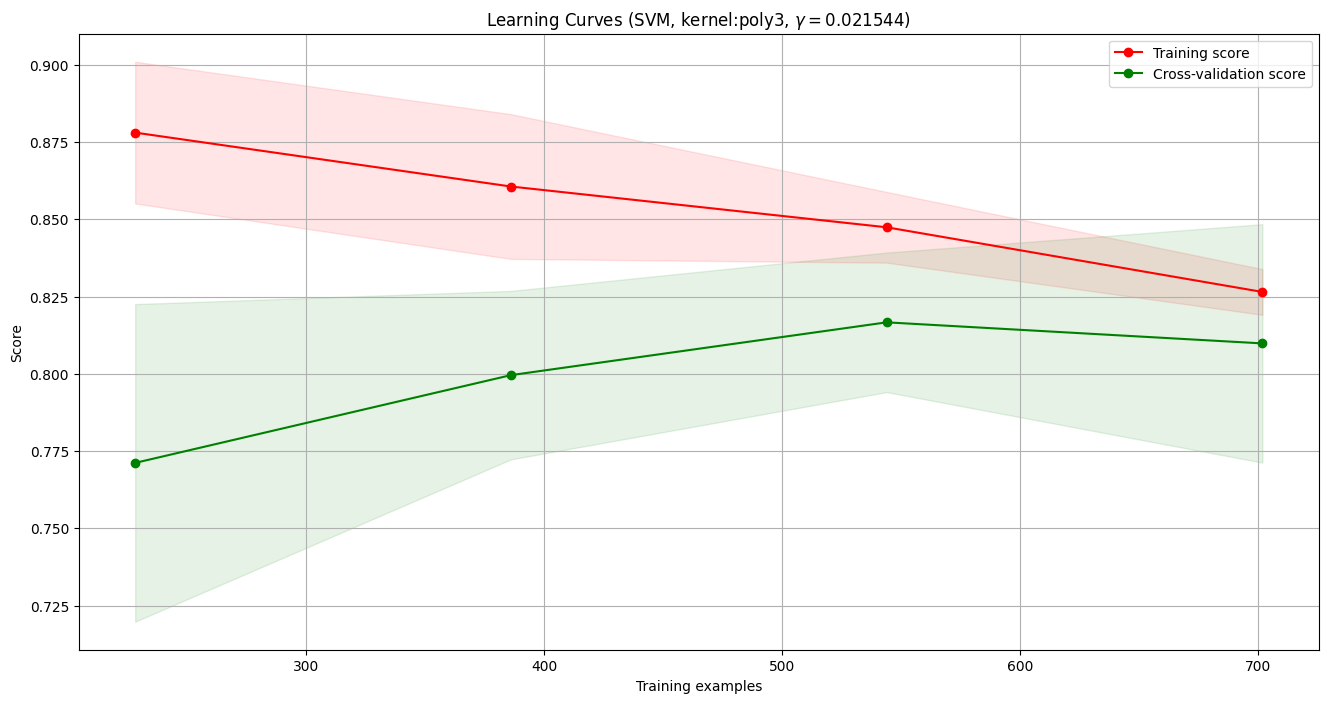

CPU times: user 547 ms, sys: 149 ms, total: 697 ms
Wall time: 9min 1s


In [79]:
%%time
title = f'Learning Curves (SVM, kernel:{clf_svc.best_estimator_.kernel}{clf_svc.best_estimator_.degree}, $\gamma={clf_svc.best_estimator_.gamma:.6f}$)'
graph = plot_learning_curve(clf_svc, title, X_train, y_train, cv=cv)
graph.show()

## 5.2 - [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)  

k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

+ In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

+ In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.

It works by finding the distances between the new data point added and the points already existed in the two separate classes. Whatever class got the highest votes, the new data point belongs to that class.

EuclideanDistance(x, xi) = sqrt( sum( (xj — xij)² ) )

![knn](https://miro.medium.com/max/1400/1*T8Pnw0kiVbrPGnqnB2I_Zw.jpeg)

Classification Report
              precision    recall  f1-score   support

    Perished       0.88      0.81      0.84       110
    Survived       0.73      0.83      0.78        69

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC Score: 0.8175889328063242
Accuracy Score: 0.8156424581005587
Average Precision Score: 0.6707180359111377
f1 Score: 0.7755102040816326
Confusion matrix, without normalization
[[89 21]
 [12 57]]
CPU times: user 516 ms, sys: 183 ms, total: 700 ms
Wall time: 144 ms


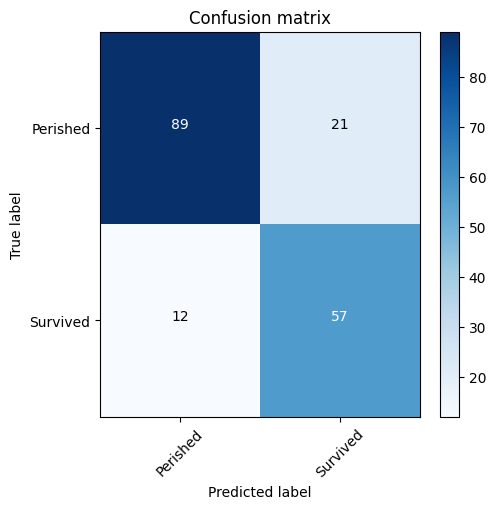

In [80]:
%%time

from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=25,
                               weights='uniform', 
                               algorithm='auto', 
                               leaf_size=30, 
                               p=4, 
                               metric='minkowski', 
                               metric_params=None, 
                               n_jobs=-1).fit(X_train, y_train)

roc_knn = clf_eval(clf_knn, X_test, y_test)

## 5.3 - [Decision Trees](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  

Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

Decision tree algorithms are referred to as CART or Classification and Regression Trees. It is a flowchart like a tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

+ A Gini score gives an idea of how good a split is by how mixed the response classes are in the groups created by the split.

![dtree](https://elf11.github.io/images/decisionTree.png)

Classification Report
              precision    recall  f1-score   support

    Perished       0.81      0.83      0.82       110
    Survived       0.72      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

ROC Score: 0.7614624505928853
Accuracy Score: 0.776536312849162
Average Precision Score: 0.6156961125874151
f1 Score: 0.7058823529411765
Confusion matrix, without normalization
[[91 19]
 [21 48]]
CPU times: user 73 ms, sys: 20.3 ms, total: 93.4 ms
Wall time: 65.2 ms


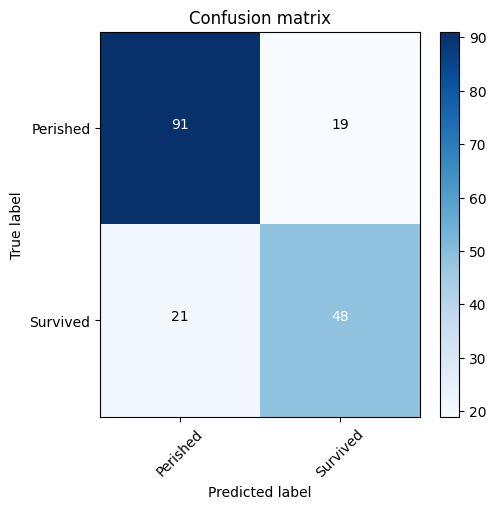

In [81]:
%%time

from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(criterion='gini', 
                                 splitter='best', 
                                 max_depth=None, 
                                 min_samples_split=3, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_features=None, 
                                 random_state=0, 
                                 max_leaf_nodes=None, 
                                 class_weight=None,).fit(X_train, y_train)

roc_dtc = clf_eval(clf_dtc, X_test, y_test)

## 5.4 - Ensemble Classifiers

A linear classifier achieves this by making a classification decision based on the value of a linear combination of the characteristics. An object's characteristics are also known as feature values and are typically presented to the machine in a vector called a feature vector. Such classifiers work well for practical problems such as document classification, and more generally for problems with many variables (features), reaching accuracy levels comparable to non-linear classifiers while taking less time to train and use.

We have many type of ensembles: 
+ Bagging
+ Boosting 
+ Voting & Stacking

### 5.4.1 - Bagging

http://scikit-learn.org/stable/modules/ensemble.html

Bootstrap aggregating, also called bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach. Random Forests are the most common type of bagging algorithms.

#### 5.4.1.1 -  [Random Forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  

http://blog.yhathq.com/posts/random-forests-in-python.html  
http://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/  

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

+ Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree.     
+ The model then selects the mode of all of the predictions of each decision tree (bagging).

Classification Report
              precision    recall  f1-score   support

    Perished       0.86      0.92      0.89       110
    Survived       0.85      0.77      0.81        69

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179

ROC Score: 0.8431488801054019
Accuracy Score: 0.8603351955307262
Average Precision Score: 0.7460007156270486
f1 Score: 0.8091603053435115
Confusion matrix, without normalization
[[101   9]
 [ 16  53]]
CPU times: user 808 ms, sys: 226 ms, total: 1.03 s
Wall time: 636 ms


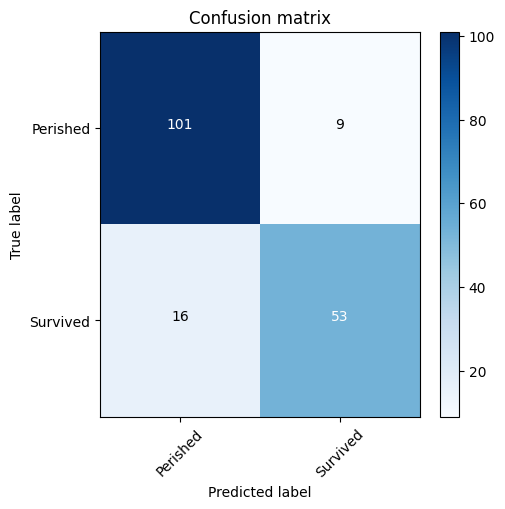

In [82]:
%%time

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=300, 
                                criterion='gini', 
                                max_depth=None, 
                                min_samples_split=3, #2,
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_features='sqrt', 
                                max_leaf_nodes=None, 
                                bootstrap=True, 
                                oob_score=False, 
                                n_jobs=-1, 
                                random_state=0, 
                                verbose=0, 
                                warm_start=False, 
                                class_weight=None).fit(X_train, y_train)



roc_rf = clf_eval(clf_rf, X_test, y_test)

#### Assessing the importance of the features

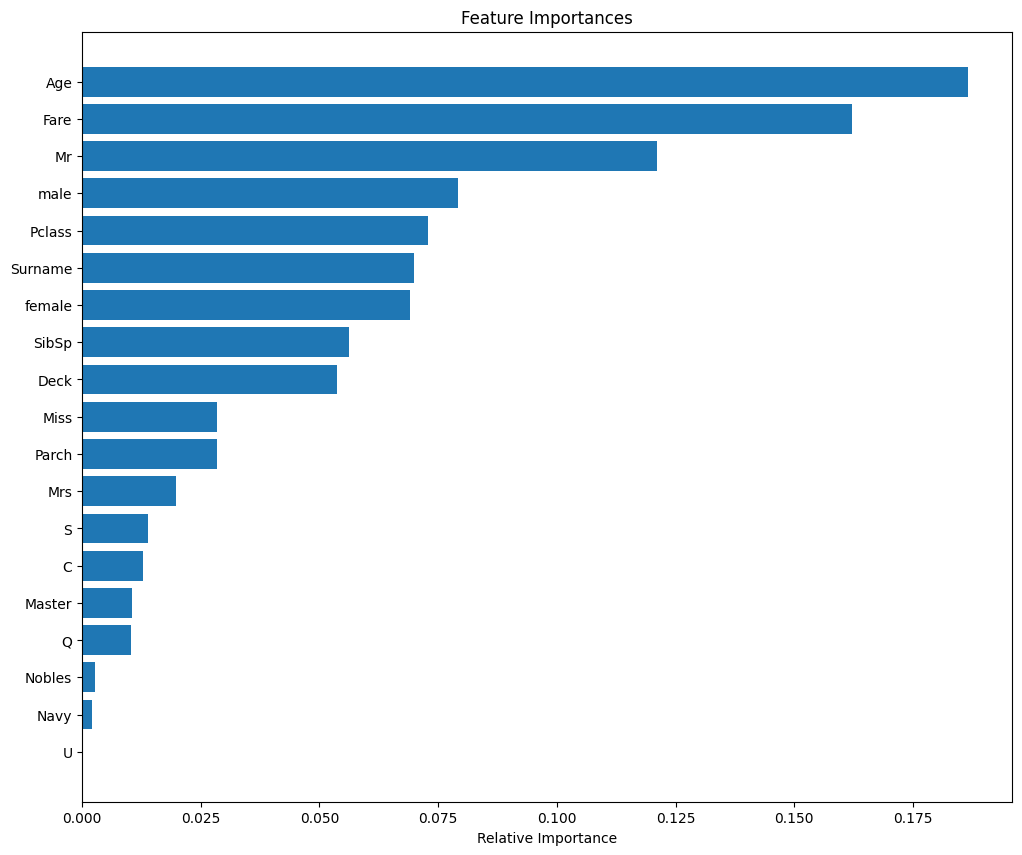

In [83]:
features = X_train.columns
importances = clf_rf.feature_importances_
indices = np.argsort(importances) #[0:9])  # top 10 features
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### 5.4.1.2 -  [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)   

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

Classification Report
              precision    recall  f1-score   support

    Perished       0.87      0.82      0.85       110
    Survived       0.74      0.81      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC Score: 0.8148880105401844
Accuracy Score: 0.8156424581005587
Average Precision Score: 0.6706424794071649
f1 Score: 0.7724137931034482
Confusion matrix, without normalization
[[90 20]
 [13 56]]
CPU times: user 87.9 ms, sys: 14.6 ms, total: 102 ms
Wall time: 140 ms


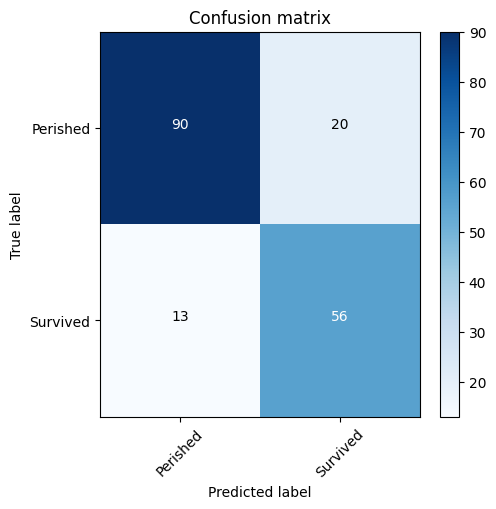

In [84]:
%%time

from sklearn.ensemble import BaggingClassifier
clf_bgc = BaggingClassifier(clf_lr).fit(X_train, y_train)   ## Using the previously fitted Logistic Regression
roc_bgc = clf_eval(clf_bgc, X_test, y_test)

#### 5.4.1.3 - [Extra Trees Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

Classification Report
              precision    recall  f1-score   support

    Perished       0.85      0.86      0.86       110
    Survived       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC Score: 0.8086297760210804
Accuracy Score: 0.8212290502793296
Average Precision Score: 0.6798736461003217
f1 Score: 0.7647058823529411
Confusion matrix, without normalization
[[95 15]
 [17 52]]
CPU times: user 382 ms, sys: 23.7 ms, total: 406 ms
Wall time: 380 ms


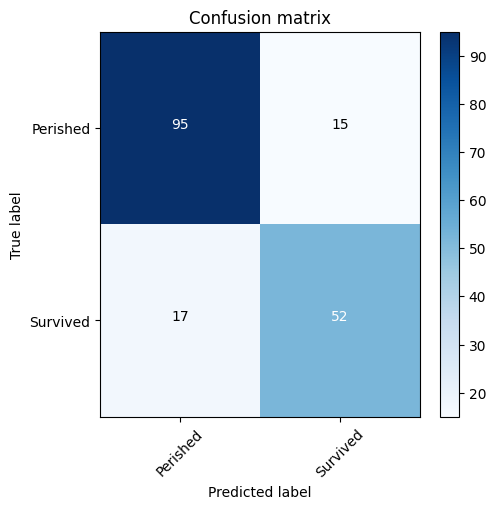

In [85]:
%%time

from sklearn.ensemble import ExtraTreesClassifier

clf_etc = ExtraTreesClassifier(n_estimators=300,
                               max_depth=None,
                               min_samples_split=3,
                               random_state=0).fit(X_train, y_train)

roc_etc = clf_eval(clf_etc, X_test, y_test)

### 5.4.2 - Boosting

Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones. Boosting is based on the question posed by Kearns and Valiant (1988, 1989): Can a set of weak learners create a single strong learner? A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

#### 5.4.2.1 - [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

Adaptive boost is also an ensemble algorithm that leverages bagging and boosting methods to develop an enhanced predictor.

+ AdaBoost creates a forest of stumps rather than trees. A stump is a tree that is made of only one node and two leaves.
+ AdaBoost takes a more iterative approach in the sense that it seeks to iteratively improve from the mistakes that the previous stump(s) made.

Classification Report
              precision    recall  f1-score   support

    Perished       0.86      0.82      0.84       110
    Survived       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179

ROC Score: 0.800395256916996
Accuracy Score: 0.8044692737430168
Average Precision Score: 0.6548917146439615
f1 Score: 0.7552447552447553
Confusion matrix, without normalization
[[90 20]
 [15 54]]
CPU times: user 453 ms, sys: 8.3 ms, total: 461 ms
Wall time: 438 ms


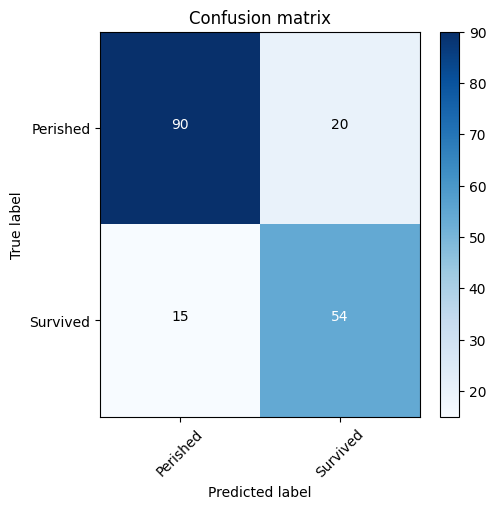

In [86]:
%%time

from sklearn.ensemble import AdaBoostClassifier

clf_abc = AdaBoostClassifier(base_estimator=None,
                             n_estimators=300,
                             learning_rate=0.1,
                             algorithm='SAMME.R',
                             random_state=0).fit(X_train, y_train)

roc_abc = clf_eval(clf_abc, X_test, y_test)

#### 5.4.2.2 - [Gradient Boost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html):  

Gradient Boost is also an ensemble algorithm that uses boosting methods to develop an enhanced predictor.

+ Unlike AdaBoost which builds stumps, Gradient Boost builds trees with usually 8–32 leaves.
+ Gradient Boost views the boosting problem as an optimization problem, where it uses a loss function and tries to minimize the error. This is why it’s called Gradient boost, as it’s inspired by gradient descent.

Classification Report
              precision    recall  f1-score   support

    Perished       0.87      0.88      0.88       110
    Survived       0.81      0.80      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

ROC Score: 0.8394598155467721
Accuracy Score: 0.8491620111731844
Average Precision Score: 0.7229266980049246
f1 Score: 0.8029197080291971
Confusion matrix, without normalization
[[97 13]
 [14 55]]
CPU times: user 289 ms, sys: 11.7 ms, total: 301 ms
Wall time: 276 ms


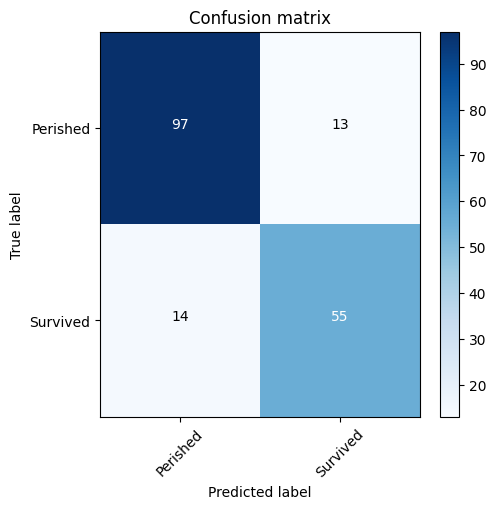

In [87]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier(loss='log_loss',
                                     learning_rate=0.1,
                                     n_estimators=200,
                                     subsample=1.0, 
                                     min_samples_split=3, 
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, 
                                     max_depth=3, 
                                     init=None, 
                                     random_state=0, 
                                     max_features=None, 
                                     verbose=0, 
                                     max_leaf_nodes=None, 
                                     warm_start=False,).fit(X_train, y_train)

roc_gbc = clf_eval(clf_gbc, X_test, y_test)

#### 5.4.2.3 - [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package)  

XGBoost is one of the most popular and widely used algorithms today because it is simply so powerful.

+ It is similar to Gradient Boost but has a few extra features that make it that much stronger.
+ Newton Boosting — Provides a direct route to the minima than gradient descent, making it much faster.
+ An extra randomization parameter — reduces the correlation between trees, ultimately improving the strength of the ensemble.

Classification Report
              precision    recall  f1-score   support

    Perished       0.84      0.92      0.88       110
    Survived       0.85      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC Score: 0.8214097496706194
Accuracy Score: 0.8435754189944135
Average Precision Score: 0.7202449811927669
f1 Score: 0.7812499999999999
Confusion matrix, without normalization
[[101   9]
 [ 19  50]]
CPU times: user 837 ms, sys: 27.9 ms, total: 865 ms
Wall time: 169 ms


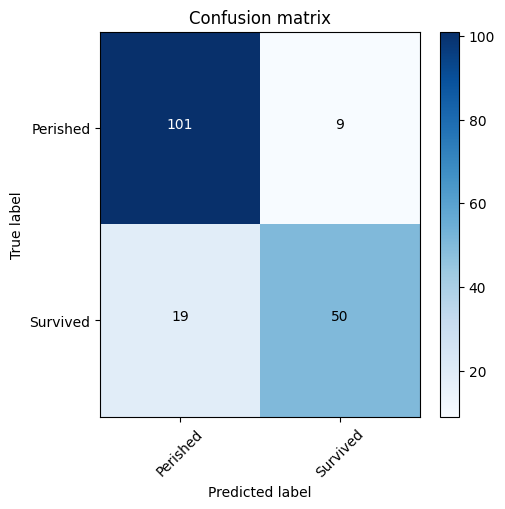

In [88]:
%%time

import xgboost

clf_xgb = xgboost.sklearn.XGBClassifier(base_score=0.5,
                                        learning_rate=0.1,
                                        n_estimators=250,
                                        max_delta_step=0,
                                        max_depth=2,
                                        min_child_weight=1,
                                        missing=1,
                                        gamma=0.1,
                                        subsample=1,
                                        colsample_bylevel=1,
                                        colsample_bytree=1,
                                        objective= 'binary:logitraw',
                                        #objective='multi:softprob',
                                        eval_metric='auc',
                                        #eval_metric='logloss',
                                        reg_alpha=0, 
                                        reg_lambda=1,
                                        nthread=-1,
                                        scale_pos_weight=1,
                                        seed=0,
                                        use_label_encoder=False,
                                        random_state=0).fit(X_train, y_train)

roc_xgb = clf_eval(clf_xgb, X_test, y_test)

#### 5.4.2.4 - Light GBM: 

It is another type of boosting algorithm that has shown to be faster and sometimes more accurate than XGBoost.

+ It uses a unique technique called Gradient-based One-side sampling (GOSS) to filter out the data instances to find a split value.

Classification Report
              precision    recall  f1-score   support

    Perished       0.86      0.87      0.87       110
    Survived       0.79      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC Score: 0.8276679841897234
Accuracy Score: 0.8379888268156425
Average Precision Score: 0.7052822586406435
f1 Score: 0.7883211678832117
Confusion matrix, without normalization
[[96 14]
 [15 54]]
CPU times: user 526 ms, sys: 19.7 ms, total: 546 ms
Wall time: 120 ms


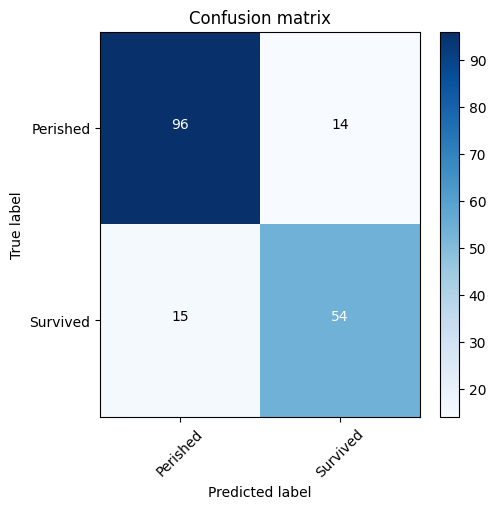

In [89]:
%%time

import lightgbm as lgb

params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'num_leaves': 64, 
          'learning_rate': 0.05, 
          'max_bin': 512, 
          'subsample_for_bin': 200,
          'subsample': 1, 
          'subsample_freq': 1, 
          'colsample_bytree': 0.8, 
          'reg_alpha': 5, 
          'reg_lambda': 10,
          'min_split_gain': 0.15, 
          'min_child_weight': 1, 
          'min_child_samples': 5, 
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

clf_lgb = lgb.LGBMClassifier(boosting_type= 'gbdt',
                             objective = 'binary',
                             n_jobs = -1,
                             max_depth = params['max_depth'],
                             max_bin = params['max_bin'],
                             subsample_for_bin = params['subsample_for_bin'],
                             subsample = params['subsample'],
                             subsample_freq = params['subsample_freq'],
                             min_split_gain = params['min_split_gain'], 
                             min_child_weight = params['min_child_weight'], 
                             min_child_samples = params['min_child_samples'], 
                             scale_pos_weight = params['scale_pos_weight'])

clf_lgb.fit(X_train, y_train)


roc_lgb = clf_eval(clf_lgb, X_test, y_test)

#### 5.4.2.5 - [Regularized Greedy Forest](https://github.com/RGF-team/rgf)

https://www.analyticsvidhya.com/blog/2018/02/introductory-guide-regularized-greedy-forests-rgf-python/  

In Boosting algorithms, each classifier/regressor is trained on data, taking into account the previous classifiers’/regressors’ success. After each training step, the weights are redistributed. Mis-classified data increases its weights to emphasize the most difficult cases. In this way, subsequent learners will focus on them during their training. However, the boosting methods simply treat the decision tree base learner as a black box and it does not take advantage of the tree structure itself.  In a sense, boosting does a partial corrective step to the model at each iteration. In contrast, RGF performs 2 steps:

+ Finds the one step structural change to the current forest to obtain the new forest that minimises the loss function (e.g. Least squares or logloss)
+ Adjusts the leaf weights for the entire forest to minimize the loss function

Classification Report
              precision    recall  f1-score   support

    Perished       0.85      0.85      0.85       110
    Survived       0.76      0.77      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC Score: 0.8067852437417654
Accuracy Score: 0.8156424581005587
Average Precision Score: 0.6709589738251385
f1 Score: 0.762589928057554
Confusion matrix, without normalization
[[93 17]
 [16 53]]
CPU times: user 79.8 ms, sys: 21.1 ms, total: 101 ms
Wall time: 135 ms


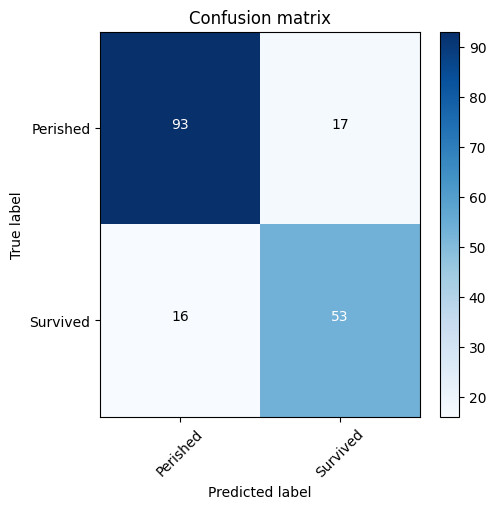

In [90]:
%%time

from rgf.sklearn import RGFClassifier, FastRGFClassifier

clf_rgf = RGFClassifier(max_leaf=100,
                        algorithm="RGF_Sib",
                        test_interval=60,
                        verbose=False,).fit(X_train, y_train)

roc_rgf = clf_eval(clf_rgf, X_test, y_test)

## 5.5 - [Bayesian Classifiers](http://scikit-learn.org/stable/modules/naive_bayes.html)  

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html  
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html  

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.

+ As the name specifies, this algorithm is entirely based on Bayes's theorem. Bayes’ theorem says we can calculate the probability of a piece of data belonging to a given class if prior knowledge is given.  
+ P(class|data) = (P(data|class) * P(class)) / P(data)

Classification Report
              precision    recall  f1-score   support

    Perished       0.86      0.82      0.84       110
    Survived       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179

ROC Score: 0.800395256916996
Accuracy Score: 0.8044692737430168
Average Precision Score: 0.6548917146439615
f1 Score: 0.7552447552447553
Confusion matrix, without normalization
[[90 20]
 [15 54]]
CPU times: user 63.8 ms, sys: 26.3 ms, total: 90.1 ms
Wall time: 58.3 ms


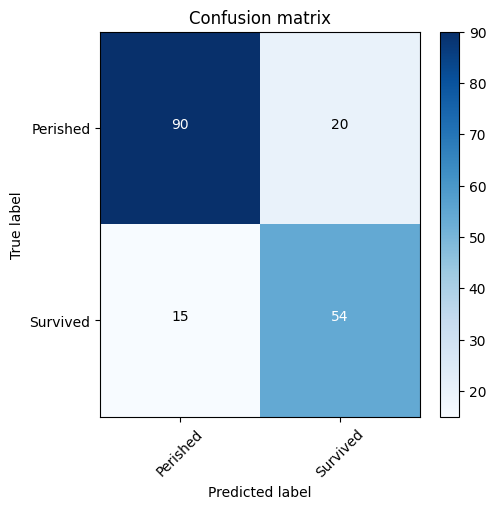

In [91]:
%%time

from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(X_train, y_train)

roc_bnb = clf_eval(clf_bnb, X_test, y_test)

## 5.6 - Gaussian Processes

In the simple linear regression setting, we have a dependent variable y that we assume can be modeled as a function of an independent variable x, i.e. y=f(x)+ϵ (where ϵ is the irreducible error) but we assume further that the function f defines a linear relationship and so we are trying to find the parameters $θ_0$ and $θ_1$ which define the intercept and slope of the line respectively, i.e. $y=θ_0+θ_1x+ϵ$.
+ Bayesian linear regression provides a probabilistic approach to this by finding a distribution over the parameters that gets updated whenever new data points are observed. 
+ The GP approach, in contrast, is a non-parametric approach, in that it finds a distribution over the possible functions $f(x)$ that are consistent with the observed data. As with all Bayesian methods it begins with a prior distribution and updates this as data points are observed, producing the posterior distribution over functions.

Classification Report
              precision    recall  f1-score   support

    Perished       0.87      0.85      0.86       110
    Survived       0.76      0.80      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC Score: 0.8212779973649538
Accuracy Score: 0.8268156424581006
Average Precision Score: 0.6871092309214728
f1 Score: 0.7801418439716311
Confusion matrix, without normalization
[[93 17]
 [14 55]]
CPU times: user 1.96 s, sys: 2.41 s, total: 4.38 s
Wall time: 649 ms


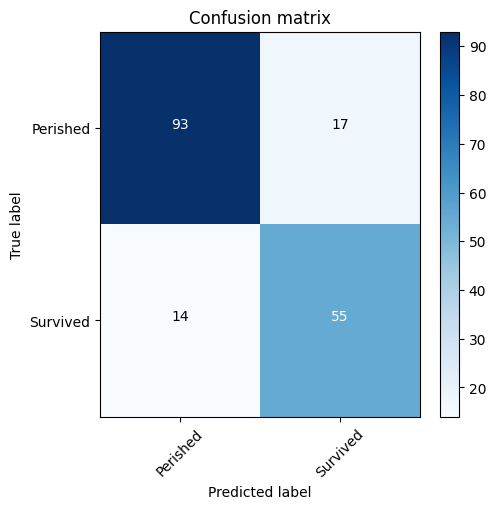

In [92]:
%%time

from sklearn.gaussian_process import GaussianProcessClassifier

clf_gpc = GaussianProcessClassifier(kernel=None, 
                                    optimizer='fmin_l_bfgs_b', 
                                    n_restarts_optimizer=0, 
                                    max_iter_predict=100, 
                                    warm_start=False, 
                                    copy_X_train=True, 
                                    random_state=0, 
                                    multi_class='one_vs_rest', 
                                    n_jobs=-1).fit(X_train, y_train)

roc_gpc = clf_eval(clf_gpc, X_test, y_test)

## 5.7 - Neural Networks

Neural nets take inspiration from the learning process occurring in human brains. They consists of an artificial network of functions, called parameters, which allows the computer to learn, and to fine tune itself, by analyzing new data. Each parameter, sometimes also referred to as neurons, is a function which produces an output, after receiving one or multiple inputs. Those outputs are then passed to the next layer of neurons, which use them as inputs of their own function, and produce further outputs. Those outputs are then passed on to the next layer of neurons, and so it continues until every layer of neurons have been considered, and the terminal neurons have received their input. Those terminal neurons then output the final result for the model.  

2022-10-03 23:34:03.177413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 23:34:03.177818: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 23:34:03.178121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 23:34:03.178451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 23:34:03.178713: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 24)                2

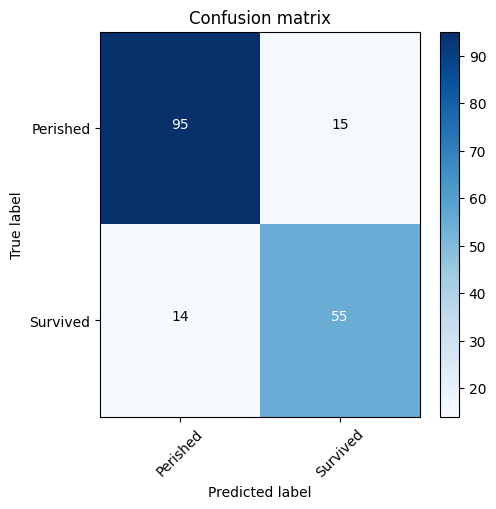

In [93]:
%%time

import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

batch_size = int(len(X_train)/25)
num_classes = 2
epochs = 30
np.random.seed(0)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(input_dim=X_train.shape[1], units=20, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[callback],
                    verbose=0,
                    shuffle=False,
                    validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred = (model.predict(X_test) > 0.5).astype("int32")

clf_matrix = confusion_matrix(y_test, y_pred)
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=['Perished', 'Survived']))
print('ROC Score: {}'.format(roc_auc_score(y_test, y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_test, y_pred)))
print('f1 Score: {}'.format(f1_score(y_test, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Perished', 'Survived'])
roc_keras = roc_auc_score(y_test, y_pred)

In [94]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


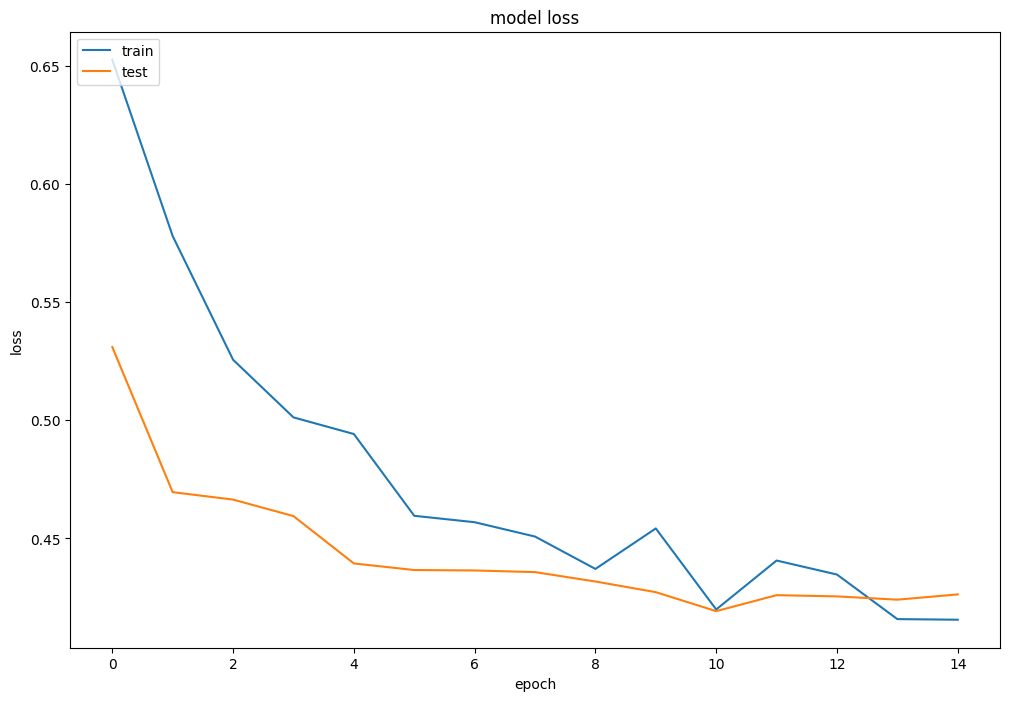

In [95]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

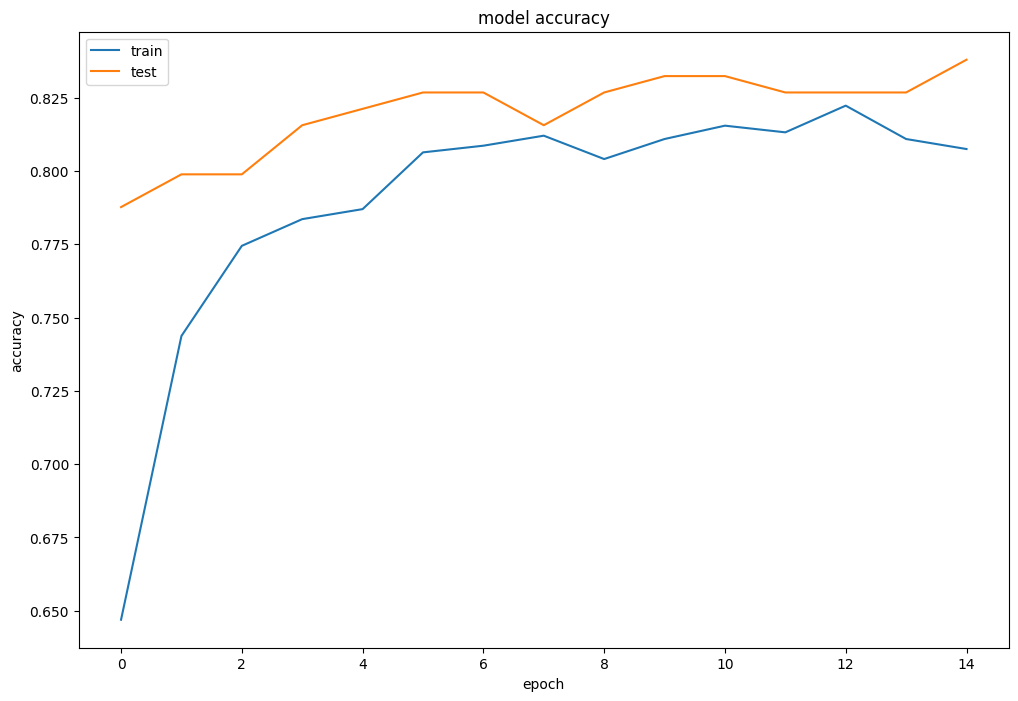

In [96]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 5.8 - AutoML / Genetic Algorithms

### 5.8.1 - [TPOT](https://github.com/rhiever/tpot)  

TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: KNeighborsClassifier(OneHotEncoder(RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=1.0, min_samples_leaf=8, min_samples_split=14, n_estimators=100), minimum_fraction=0.1, sparse=False, threshold=10), n_neighbors=24, p=2, weights=uniform)
Classification Report
              precision    recall  f1-score   support

    Perished       0.86      0.82      0.84       110
    Survived       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179

ROC Score: 0.800395256916996
Accuracy Score: 0.8044692737430168
Average Precision Score: 0.6548917146439615
f1 Score: 0.7552447552447553
Confusion matrix, without normalization
[[90 20]
 [15 54]]
CPU times: user 3min 29s, sys: 21.9 s, total: 3min 

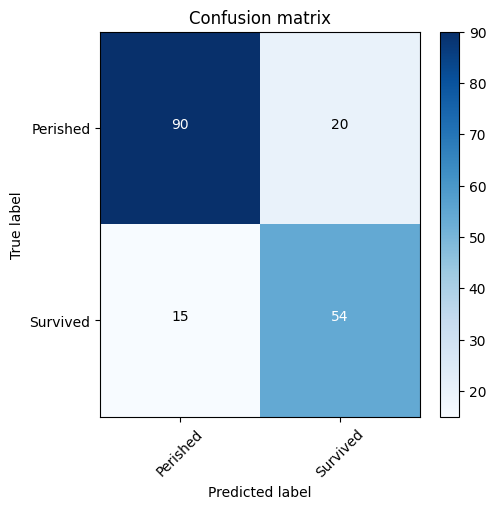

In [97]:
%%time

from tpot import TPOTClassifier

clf_tpot = TPOTClassifier(verbosity=1, 
                          max_time_mins=60, 
                          max_eval_time_mins=10, 
                          population_size=100,
                          generations=100,
                          n_jobs=-1)

clf_tpot.fit(X_train, y_train)
roc_tpot = clf_eval(clf_tpot, X_test, y_test)

### 5.8.2 - [PyCaret](https://pycaret.gitbook.io/docs/)  

https://pycaret.gitbook.io/docs/get-started/quickstart  
PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.  
It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

In [106]:
#from pycaret.classification import *
#s = setup(pd.concat([X_train, y_train], axis=1), target="Survived")

#best = compare_models()

### 5.4.3 - [Voting / Stacking](http://scikit-learn.org/stable/modules/ensemble.html#votingclassifier)  

https://medium.com/@satyam-kumar/use-voting-classifier-to-improve-the-performance-of-your-ml-model-805345f9de0e

Voting algorithms are simple strategies, where you aglomerate results of classifiers' decisions by for example taking the class which appears in most cases. 

Stacking/grading strategies are generalizations of this concept. Instead of simply saying "ok, I have a scheme v, which I will use to select the best answer among my k classifiers" you create another abstraction layer, where you actually learn to predict the correct label having k votes.

Classification Report
              precision    recall  f1-score   support

    Perished       0.85      0.85      0.85       110
    Survived       0.76      0.77      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC Score: 0.8067852437417654
Accuracy Score: 0.8156424581005587
Average Precision Score: 0.6709589738251385
f1 Score: 0.762589928057554
Confusion matrix, without normalization
[[93 17]
 [16 53]]
CPU times: user 2.41 s, sys: 580 ms, total: 2.99 s
Wall time: 3.77 s


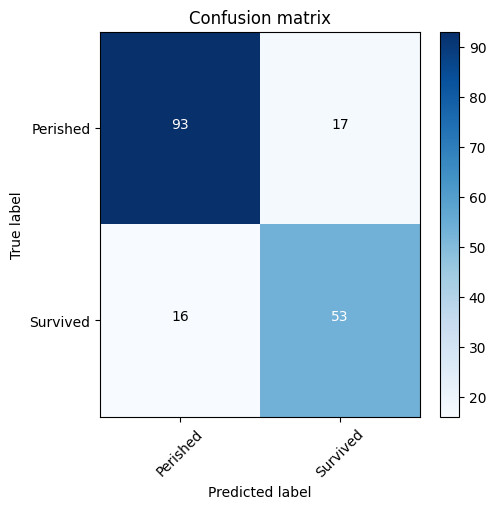

In [107]:
%%time

from sklearn.ensemble import VotingClassifier 

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    ensemble = VotingClassifier(estimators=[('clf_sgdc', clf_sgdc),
                                            ('clf_lgr', clf_lr),
                                            ('clf_rdg', clf_rgf),
                                            ('clf_bgc', clf_bgc),
                                            ('clf_etc', clf_etc),
                                            ('clf_abc', clf_abc),
                                            ('clf_pct', clf_pcp),
                                            ('clf_xgb', clf_xgb),
                                            ('clf_rf', clf_rf),
                                            ('clf_knn', clf_knn),
                                            ('clf_rgf', clf_rgf),
                                            #('clf_tpot', clf_tpot),
                                            ],
                                voting='hard',
                                weights=[1,1,1,1,1,1,1,2,1,2,1]).fit(X_train, y_train)

roc_ens = clf_eval(ensemble, X_test, y_test)

# 6 - Evaluating the results:

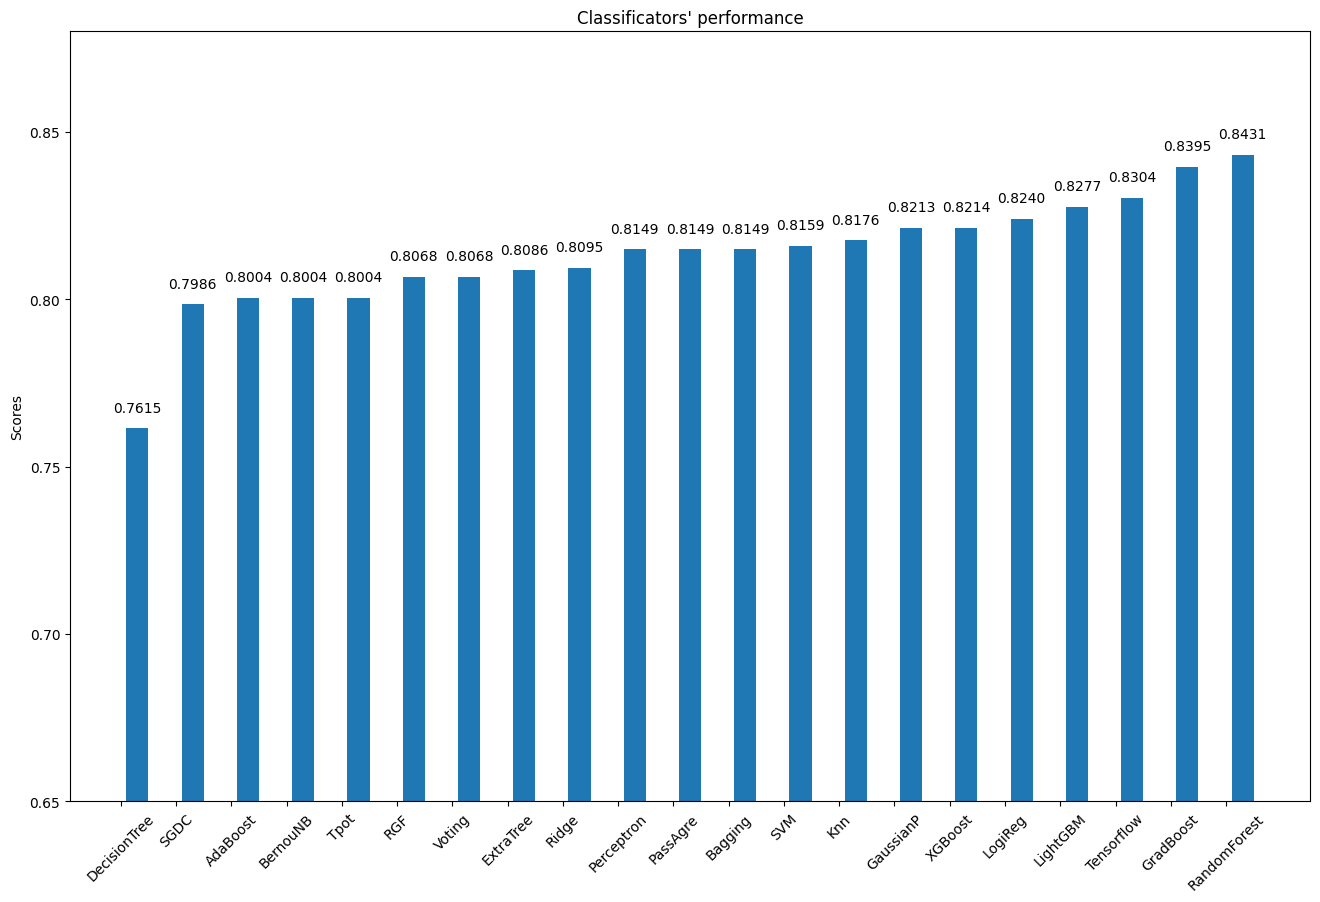

In [108]:
dic_results = {'SVM': roc_svc,
               'RandomForest': roc_rf,
               'DecisionTree': roc_dtc,
               'ExtraTree': roc_etc,
               'AdaBoost': roc_abc,
               'GradBoost': roc_gbc,
               'LightGBM': roc_lgb,
               'SGDC': roc_sgdc,
               'Ridge': roc_rdg,
               'Perceptron': roc_pcp,
               'PassAgre': roc_pac,
               'LogiReg': roc_lr,
               'BernouNB': roc_bnb,
               'RGF': roc_rgf,
               'XGBoost':roc_xgb,
               'Knn':roc_knn,
               'Tensorflow': roc_keras,
               'Bagging': roc_bgc,
               'Voting': roc_ens,
               'Tpot': roc_tpot,
               'RGF': roc_rgf,
               'GaussianP': roc_gpc,
              }

import operator
tup_results = sorted(dic_results.items(), key=operator.itemgetter(1))

N = len(dic_results)
ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
rects = ax.bar(ind+0.5, list(zip(*tup_results))[1], width,)
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 
            1.005*height, 
            '{0:.4f}'.format(height), 
            ha='center', 
            va='bottom',)

ax.set_ylabel('Scores')
ax.set_ylim(ymin=0.65,ymax = 0.88)
ax.set_title("Classificators' performance")
ax.set_xticks(ind + width/2.)
ax.set_xticklabels(list(zip(*tup_results))[0], rotation=45)

plt.show()

In [111]:
features = X_train.columns
df_fi = pd.DataFrame({'clf_lr': (abs(clf_lr.coef_[0])/sum(abs(clf_lr.coef_[0]))),    #a sort of adaptation
                      'clf_rf':clf_rf.feature_importances_,
                      'clf_xgb':clf_xgb.feature_importances_,
                      'clf_etc':clf_etc.feature_importances_,
                      'clf_abc':clf_abc.feature_importances_,
                      #'clf_bgc':clf_bgc.estimators_[0].feature_importances_,
                      'clf_bgc':(abs(clf_lr.coef_[0])/sum(abs(clf_lr.coef_[0]))),
                      'clf_gbc':clf_gbc.feature_importances_,
                      'clf_lgb':clf_lgb.feature_importances_ / sum(clf_lgb.feature_importances_),
                     },
                      index=features)
df_fi['mean_importance'] = df_fi.mean(axis=1)
df_fi.sort_values(['mean_importance'], ascending=False, inplace=True)
df_fi

,clf_lr,clf_rf,clf_xgb,clf_etc,clf_abc,clf_bgc,clf_gbc,clf_lgb,mean_importance
Mr,0.099900,0.121121,0.533232,0.144176,0.070000,0.099900,0.422050,0.020408,0.188848
Age,0.087066,0.186568,0.022648,0.147425,0.216667,0.087066,0.164632,0.353522,0.158199
Fare,0.026375,0.162096,0.017255,0.144022,0.173333,0.026375,0.119039,0.301514,0.121251
SibSp,0.147304,0.056298,0.050487,0.063049,0.133333,0.147304,0.085323,0.051350,0.091806
Pclass,0.119723,0.072766,0.087761,0.081318,0.086667,0.119723,0.063592,0.028966,0.082564
female,0.077567,0.069167,0.085915,0.083487,0.023333,0.077567,0.001062,0.017775,0.054484
Surname,0.031154,0.069991,0.018574,0.073456,0.046667,0.031154,0.045921,0.098749,0.051958
Deck,0.033636,0.053762,0.036900,0.049136,0.086667,0.033636,0.040060,0.055958,0.048719
male,0.077567,0.079109,0.000000,0.074333,0.023333,0.077567,0.005417,0.001317,0.042330
Master,0.094559,0.010547,0.019828,0.019357,0.046667,0.094559,0.002906,0.005925,0.036794


### 6.1.1 - Examining the ROC Curve

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_rgf.predict_proba(X_train)
y_hat = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_hat)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()